# Star Hotels Project
# Trisha Flores

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective | Problem Definition
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### Questions to be answered:
* Which booking is likely to be canceled based on results from LM based solution
* Which factors have a high influence on booking cancellations


## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Contents

* Importing of libraries and data
* Data Overview
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* EDA post data processing
* Checking Multicollinearity
* Building a Logistic Regression Model
* Model Performance Evaluation
* Final Model Summary
* Building a Decision Tree Model
* Do we need to prune the tree?
* Model Performance Comparision Conclusions
* Actionable Insights and Recommendations

## Importing necessary libraries and data

In [1080]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Set default theme
sns.set()

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [1081]:
# Import csv of data
data = pd.read_csv("StarHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [1082]:
# Copy it over to another variable to maintain a clean version of the data
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [1083]:
# Print the shape of the cell phone data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 56926 rows and 18 columns.


<IPython.core.display.Javascript object>

In [1084]:
# Use head to take a look at the first 5 rows to get an idea of what the data looks like
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            89.10000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

* First few rows seem to make sense based on the data dictionary
* Several categorical variables in the data
* Lots of options for the results to be 0, what does missing data look like (NaN?)
* Next I will check a random sample to see if any other insights can be gained
* Booking status is our dependent variable

In [1085]:
# Set random seed to get the same random sample each time then look at 10 random samples
np.random.seed(1)
df.sample(n=10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
10043             1               0                     0                  2   
39715             2               1                     2                  3   
30095             2               0                     0                  1   
11327             1               0                     2                  2   
45593             1               0                     2                  6   
19258             1               0                     2                  1   
5654              2               0                     1                  1   
15474             2               1                     1                  3   
16553             3               0                     0                  2   
17911             2               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
10043      Not Selected                           0        Room_Type 1   
39715       Meal Plan 1                           0        Room_Type 1   
30095      Not Selected                           0        Room_Type 1   
11327       Meal Plan 1                           0        Room_Type 1   
45593       Meal Plan 1                           0        Room_Type 1   
19258       Meal Plan 1                           0        Room_Type 5   
5654        Meal Plan 1                           0        Room_Type 1   
15474       Meal Plan 1                           0        Room_Type 1   
16553       Meal Plan 1                           0        Room_Type 4   
17911       Meal Plan 1                           0        Room_Type 4   

       lead_time  arrival_year  arrival_month  arrival_date  \
10043         37          2018             10            27   
39715        104          2019              4             6   
30095         20          2019              4            20   
11327        162          2018             10            14   
45593        115          2018              2            27   
19258          2          2019              5             7   
5654           0          2017              9            21   
15474         57          2018              8            15   
16553         73          2018              9             6   
17911          6          2017             12            31   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
10043              Online               0                             0   
39715              Online               0                             0   
30095              Online               0                             0   
11327              Online               0                             0   
45593             Offline               0                             0   
19258            Aviation               1                             0   
5654            Corporate               0                             0   
15474              Online               0                             0   
16553              Online               0                             0   
17911              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
10043                                     0           109.00000   
39715                                     0           101.15000   
30095                                     0           115.00000   
11327                                     0           115.00000   
45593                                     0            64.75000   
19258                                     1           125.00000   
5654                                      0            65.00000   
15474                                     0           152.10000   
16553                                     0           168.30000   
17911                                     0           137.00000   

       no_of_special_requests booking_status  
10043 

<IPython.core.display.Javascript object>

* No further insight on potential missing values
* Seems like most reservations don't require a car parking space
* Lead time has a lot of variability
* Market segment could be predominant in Online
* Data covers a good variety on booking options

In [1086]:
# Get detailed info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

* There are 4 categorical variables
* 1 float variable (avg price) and the rest are integers
* Doesn't appear to have missing values, yay

In [1087]:
# Add categorical variables into a list to loop through and change to category type
cat_vars = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]

for colname in cat_vars:
    df[colname] = df[colname].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   type_of_meal_plan                     56926 non-null  category
 5   required_car_parking_space            56926 non-null  int64   
 6   room_type_reserved                    56926 non-null  category
 7   lead_time                             56926 non-null  int64   
 8   arrival_year                          56926 non-null  int64   
 9   arrival_month                         56926 non-null  int64   
 10  arrival_date                          56926 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

In [1088]:
# Verifying columns don't have missing values
df.isnull().sum().sort_values(ascending=False)

no_of_adults                            0
no_of_children                          0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_month                           0
arrival_year                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [1089]:
# Get the number of unique values in each column
df.nunique().sort_values(ascending=False)

avg_price_per_room                      4939
lead_time                                397
no_of_previous_bookings_not_canceled      73
arrival_date                              31
no_of_week_nights                         18
arrival_month                             12
no_of_previous_cancellations               9
no_of_weekend_nights                       9
room_type_reserved                         7
no_of_special_requests                     6
no_of_children                             6
no_of_adults                               5
market_segment_type                        5
type_of_meal_plan                          4
arrival_year                               3
repeated_guest                             2
required_car_parking_space                 2
booking_status                             2
dtype: int64

<IPython.core.display.Javascript object>

* Arrival year shows that the data encompasses 3 years
* Arrivals occur during every month and day during the 3 years (at least once)
* 4 Different meal plan options
* 7 Different room types
* Market segment types have 5 different options
* I like how the arrival date is already broken down into 3 columns

In [1090]:
# Let's check for duplicate data
df[df.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

<IPython.core.display.Javascript object>

* 14350 duplicate data points, a lot more than I was expecting
* The duplicates will need to be removed

In [1091]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [1092]:
# Check to verify the data was dropped, original count was 56926
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

In [1093]:
# Get summary stats of ALL the variables
df.describe(include="all").T

count unique           top   freq  \
no_of_adults                         42576.00000    NaN           NaN    NaN   
no_of_children                       42576.00000    NaN           NaN    NaN   
no_of_weekend_nights                 42576.00000    NaN           NaN    NaN   
no_of_week_nights                    42576.00000    NaN           NaN    NaN   
type_of_meal_plan                          42576      4   Meal Plan 1  31863   
required_car_parking_space           42576.00000    NaN           NaN    NaN   
room_type_reserved                         42576      7   Room_Type 1  29730   
lead_time                            42576.00000    NaN           NaN    NaN   
arrival_year                         42576.00000    NaN           NaN    NaN   
arrival_month                        42576.00000    NaN           NaN    NaN   
arrival_date                         42576.00000    NaN           NaN    NaN   
market_segment_type                        42576      5        Online  34169   
repeated_guest                       42576.00000    NaN           NaN    NaN   
no_of_previous_cancellations         42576.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 42576.00000    NaN           NaN    NaN   
avg_price_per_room                   42576.00000    NaN           NaN    NaN   
no_of_special_requests               42576.00000    NaN           NaN    NaN   
booking_status                             42576      2  Not_Canceled  28089   

                                           mean      std        min  \
no_of_adults                            1.91674  0.52752    0.00000   
no_of_children                          0.14215  0.45992    0.00000   
no_of_weekend_nights                    0.89527  0.88786    0.00000   
no_of_week_nights                       2.32117  1.51933    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03436  0.18216    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              77.31595 77.27962    0.00000   
arrival_year                         2018.29789  0.62613 2017.00000   
arrival_month                           6.36549  3.05192    1.00000   
arrival_date                           15.68287  8.81399    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.03089  0.17301    0.00000   
no_of_previous_cancellations            0.02541  0.35819    0.00000   
no_of_previous_bookings_not_canceled    0.22273  2.24231    0.00000   
avg_price_per_room                    112.37580 40.86590    0.00000   
no_of_special_requests                  0.76811  0.83726    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              16.00000   53.00000  118.00000   
arrival_year                         2018.00000 2018.00000 2019.00000   
arrival_month                           4.00000    6.00000    9.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

<IPython.core.display.Javascript object>

* Non_canceled is the higher count for booking status which is good considering the customer, however it's only higher by a little over half...which is why the problem 
* Online market is highest as guessed by the random sample
* Room type 1 and Meal Plan 1 are the predominant types with counts around 75%
* Number of adults are mostly 2 with a max of 4, not a lot of variability
* Number of kids seem to be mostly 0 but has a max of 10
* Number of weekend nights has a max of 10, that will need to be looked at; along with number of week nights at 17
* Required parking is mostly 0 with a max of 1; really uniform
* Lead time seems to be around 0 to 150 with a max of 521, outlier?
* Looking at this I'd like to treat arrival time as a categorical value...hmmm
* And repeated guest as yes or no to get the unique stats but it seems to be mostly 0's
* Number of previous cancellations is mostly 0 with a max of 13
* Number of previous bookings not cancelled is mostly 0's with a max of 72!
* Avg price of rooms is typically within 40 but has a high of 540; maybe tied to room type
* Number of special request seem to be low with a max of 5

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Additional insight questions**:

7. What is the predominant room type and meal type selected by repeat guests?
8. What is the predominant month for repeat guests?
9. Do people who book with kids cancel more than guest without since kids add complexity to travel plans?
10. What is the percentage of repeat guests?
11. Is there a higher avg cost based on month of the year of arrival? 
12. Is there a higher avg cost associated with room type?

In [1094]:
# First define boxplot/histogram and bargraph graphics that are well used in class and projects for EDA univariate analysis
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [1095]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=13,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Univariate analysis

4. What percentage of bookings are canceled? 

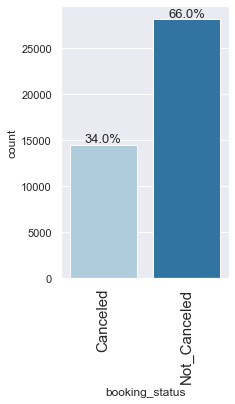

<IPython.core.display.Javascript object>

In [1096]:
# First want to visualize the planned predicted variable
labeled_barplot(df, "booking_status", perc=True)
# plt.savefig("BookingStatusBar.jpg", bbox_inches="tight")

* Not cancelled is at 62% with ~40% of guests cancelling
* Too high of a cancellation percentage for Star Hotels with this being high impact on various fronts

1. What are the busiest months in the hotel?

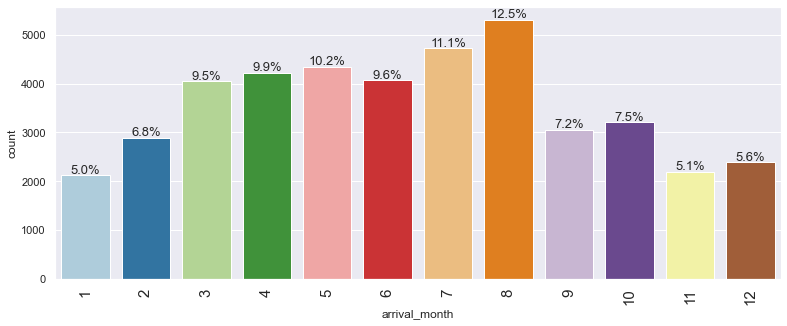

<IPython.core.display.Javascript object>

In [1097]:
labeled_barplot(df, "arrival_month", perc=True)
# plt.savefig("ArrivalMonBar.jpg", bbox_inches="tight")

* Northern hemisphere summer months have the highest percentages of arrivals (or are busiest months)
* Summer months consist of ~50% of arrivals
* Lowest month of arrivals is January with November and December close behind; then February

2. Which market segment do most of the guests come from?

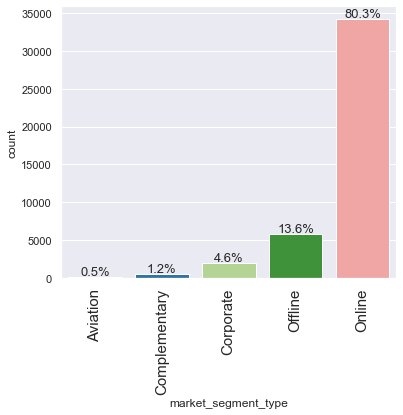

<IPython.core.display.Javascript object>

In [1313]:
labeled_barplot(df, "market_segment_type", perc=True)
plt.savefig("MarketSegmentBar.jpg", bbox_inches="tight")

* Wow, 80% of guests come from market segment of online...though not surprising as the internet is easiest way to book
* Next market segment is Offline (telephone?)
* Aviation is smallest market followed by Complementary and then Corporate covers nearly 5%

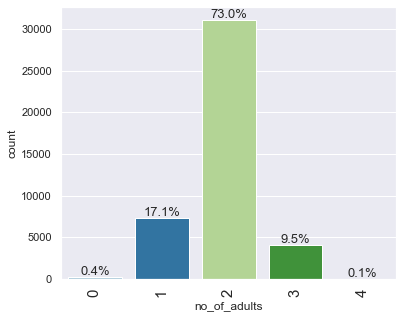

<IPython.core.display.Javascript object>

In [1099]:
labeled_barplot(df, "no_of_adults", perc=True)
# plt.savefig("NoAdultsBar.jpg", bbox_inches="tight")

* Most of the bookings are of 2 adults
* There is a percentage of bookings with 0 adults...shouldn't be possible but it's higher than 4 adults | outlier?

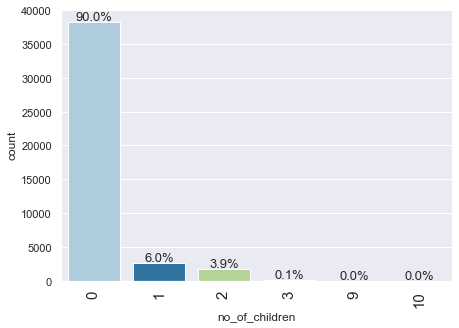

<IPython.core.display.Javascript object>

In [1100]:
labeled_barplot(df, "no_of_children", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* By a huge percentage, 92%, most bookings are without children
* Seems like couples book at these hotels the most without kids
* 10 and 9 kids are both 0% | outliers?

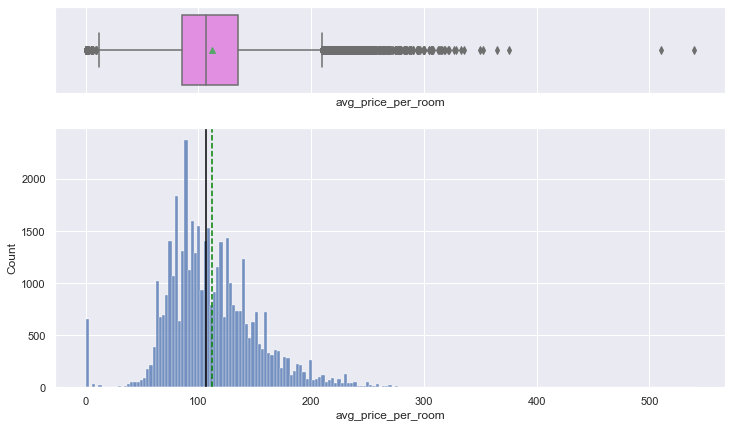

<IPython.core.display.Javascript object>

In [1101]:
histogram_boxplot(df, "avg_price_per_room")

* Median and mean are neary the same, fairly normal distribution but some right skewness
* Several 0 values, are they the complementary rooms? or outliers?
* Most rooms are below 200 euros

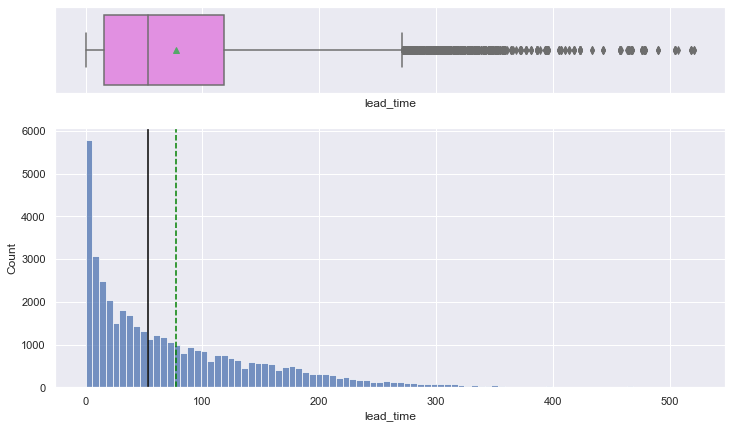

<IPython.core.display.Javascript object>

In [1102]:
histogram_boxplot(df, "lead_time")

* Lead time is predominantly 0 
* Right skewed distribution
* Mean and median not close

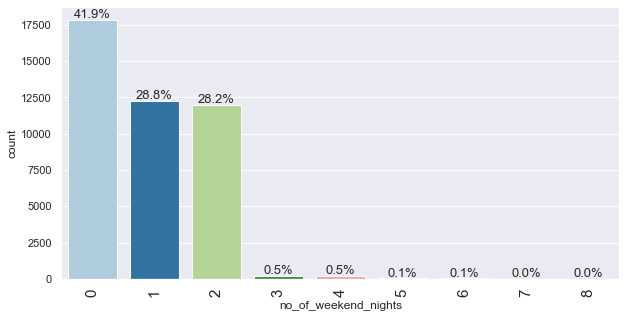

<IPython.core.display.Javascript object>

In [1103]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Most bookings are split with 45% not have weekend nights
* And a combined with 1 and 2 weekend nights ~50%
* Above 2 has to be outliers...unless the bookings span several weeks long, doesn't seem we have that information. Duration of stay would help clarify this metric

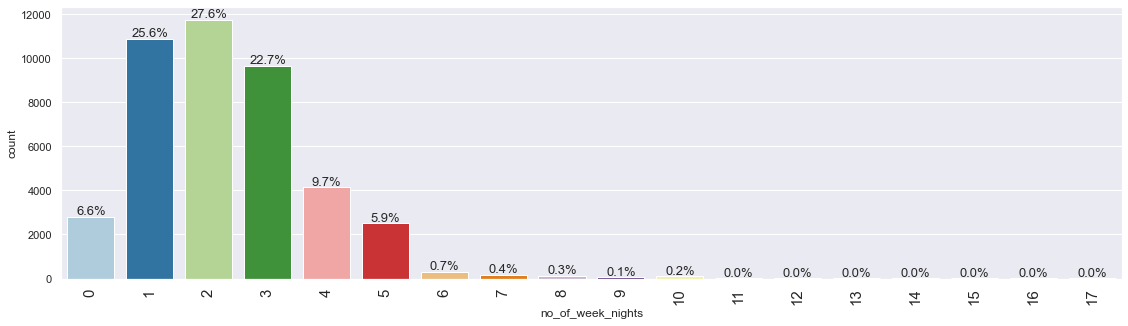

<IPython.core.display.Javascript object>

In [1104]:
labeled_barplot(df, "no_of_week_nights", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Highest percentage is 2 weeknights
* Again the higher number of weeknights is questionable without knowing the total duration of stay
* Are there data points with both week and weekend nights as 0?

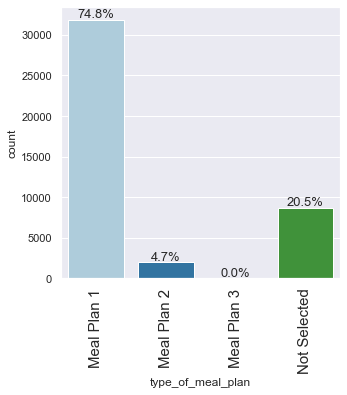

<IPython.core.display.Javascript object>

In [1312]:
labeled_barplot(df, "type_of_meal_plan", perc=True)
plt.savefig("Meal_plan.jpg", bbox_inches="tight")

* Can see Meal Plan 1 is highest selected
* Next is not selected
* Meal plan 3 is at 0%?

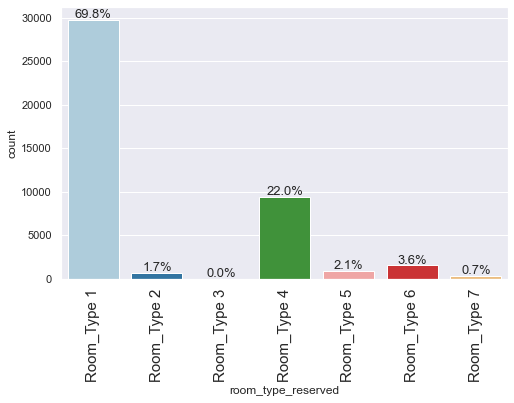

<IPython.core.display.Javascript object>

In [1311]:
labeled_barplot(df, "room_type_reserved", perc=True)
plt.savefig("room_type.jpg", bbox_inches="tight")

* Room type 1 is highest at 75%
* Room type 2 has almost 20% of selections
* Room type 3 is at 0%, again is it an outlier or just never selected

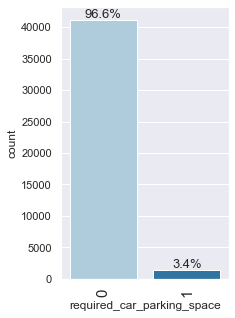

<IPython.core.display.Javascript object>

In [1107]:
labeled_barplot(df, "required_car_parking_space", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Seems to be a very small percentage require parking, 2.6%

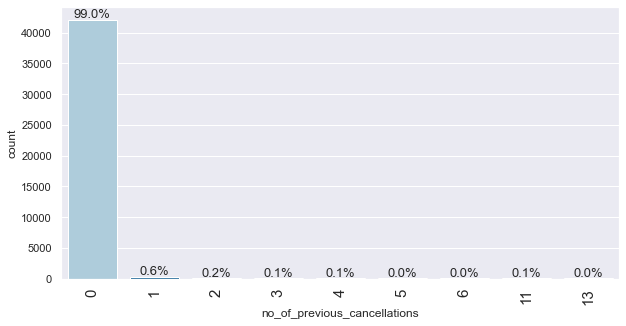

<IPython.core.display.Javascript object>

In [1108]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* 99% have not had previous cancellations
* 6 and 13 are both at 0%

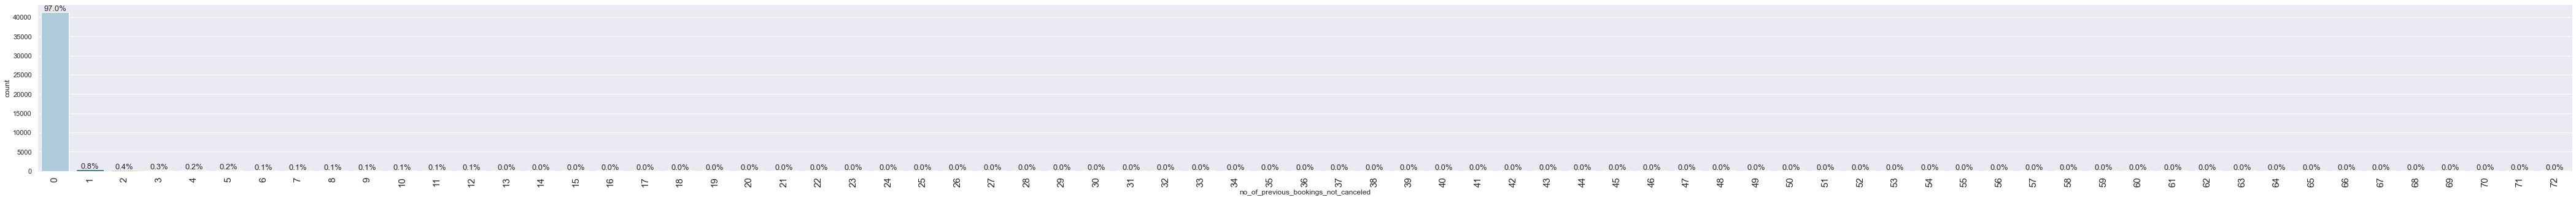

<IPython.core.display.Javascript object>

In [1109]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* 97% of previous bookings weren't cancelled
* And the rest of the 3 % is skewed between 71 different values

In [1110]:
book0 = df[(df["no_of_previous_bookings_not_canceled"] == 0)]
bookN = df[(df["no_of_previous_bookings_not_canceled"] > 0)]
bookN1 = df[(df["no_of_previous_bookings_not_canceled"] > 17)]
f1 = book0.value_counts().sum(axis=0)
f2 = bookN.value_counts().sum(axis=0)
f3 = bookN1.value_counts().sum(axis=0)
print(f1, f2, f3)

41314 1262 134


<IPython.core.display.Javascript object>

* Only 0.3% of the values are above 17

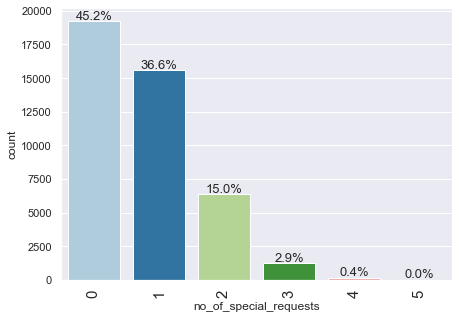

<IPython.core.display.Javascript object>

In [1111]:
labeled_barplot(df, "no_of_special_requests", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* 52% of bookings don't include special requests
* The other half have 1-2 special requests 
* A very small percentages have 3-4 special requests

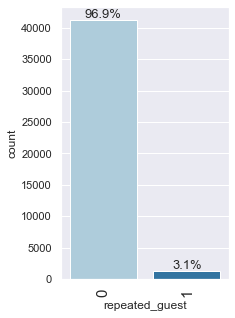

<IPython.core.display.Javascript object>

In [1112]:
labeled_barplot(df, "repeated_guest", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Most guests, 97.5 aren't repeat guests
* Only 2.5% of guests are repeat users of Star Hotels

### Bivariate Analysis

In [1113]:
# Let's start with correlations
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove(
    "arrival_year"
)  # dropping year column as it is temporal variable
numeric_columns.remove(
    "arrival_month"
)  # dropping month column as it is temporal variable
numeric_columns.remove("arrival_date")  # dropping day column as it is temporal variable

<IPython.core.display.Javascript object>

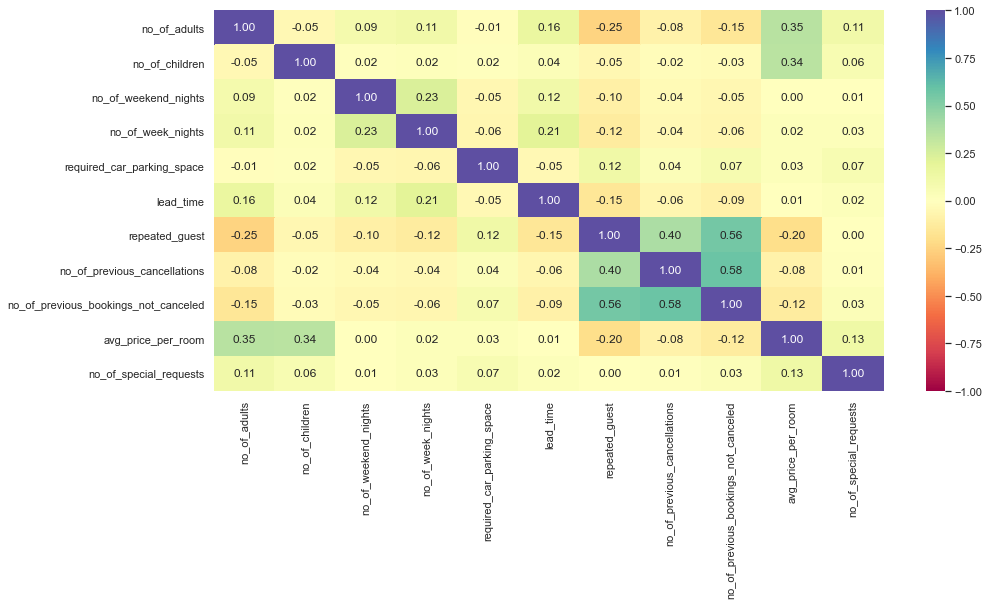

<IPython.core.display.Javascript object>

In [1114]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.savefig("heat_map.jpg", bbox_inches="tight")
plt.show()

* Highest corr is between # of previous cancellations and no of previous bookings not cancelled
* Next highest is repeat guest and no of previous bookings not cancelled, this makes sense
* Repeat guest and no of previous  cancellations also show some corr
* Otherwise not too much corr positive or neg...slight between no of adults/children versus price of room

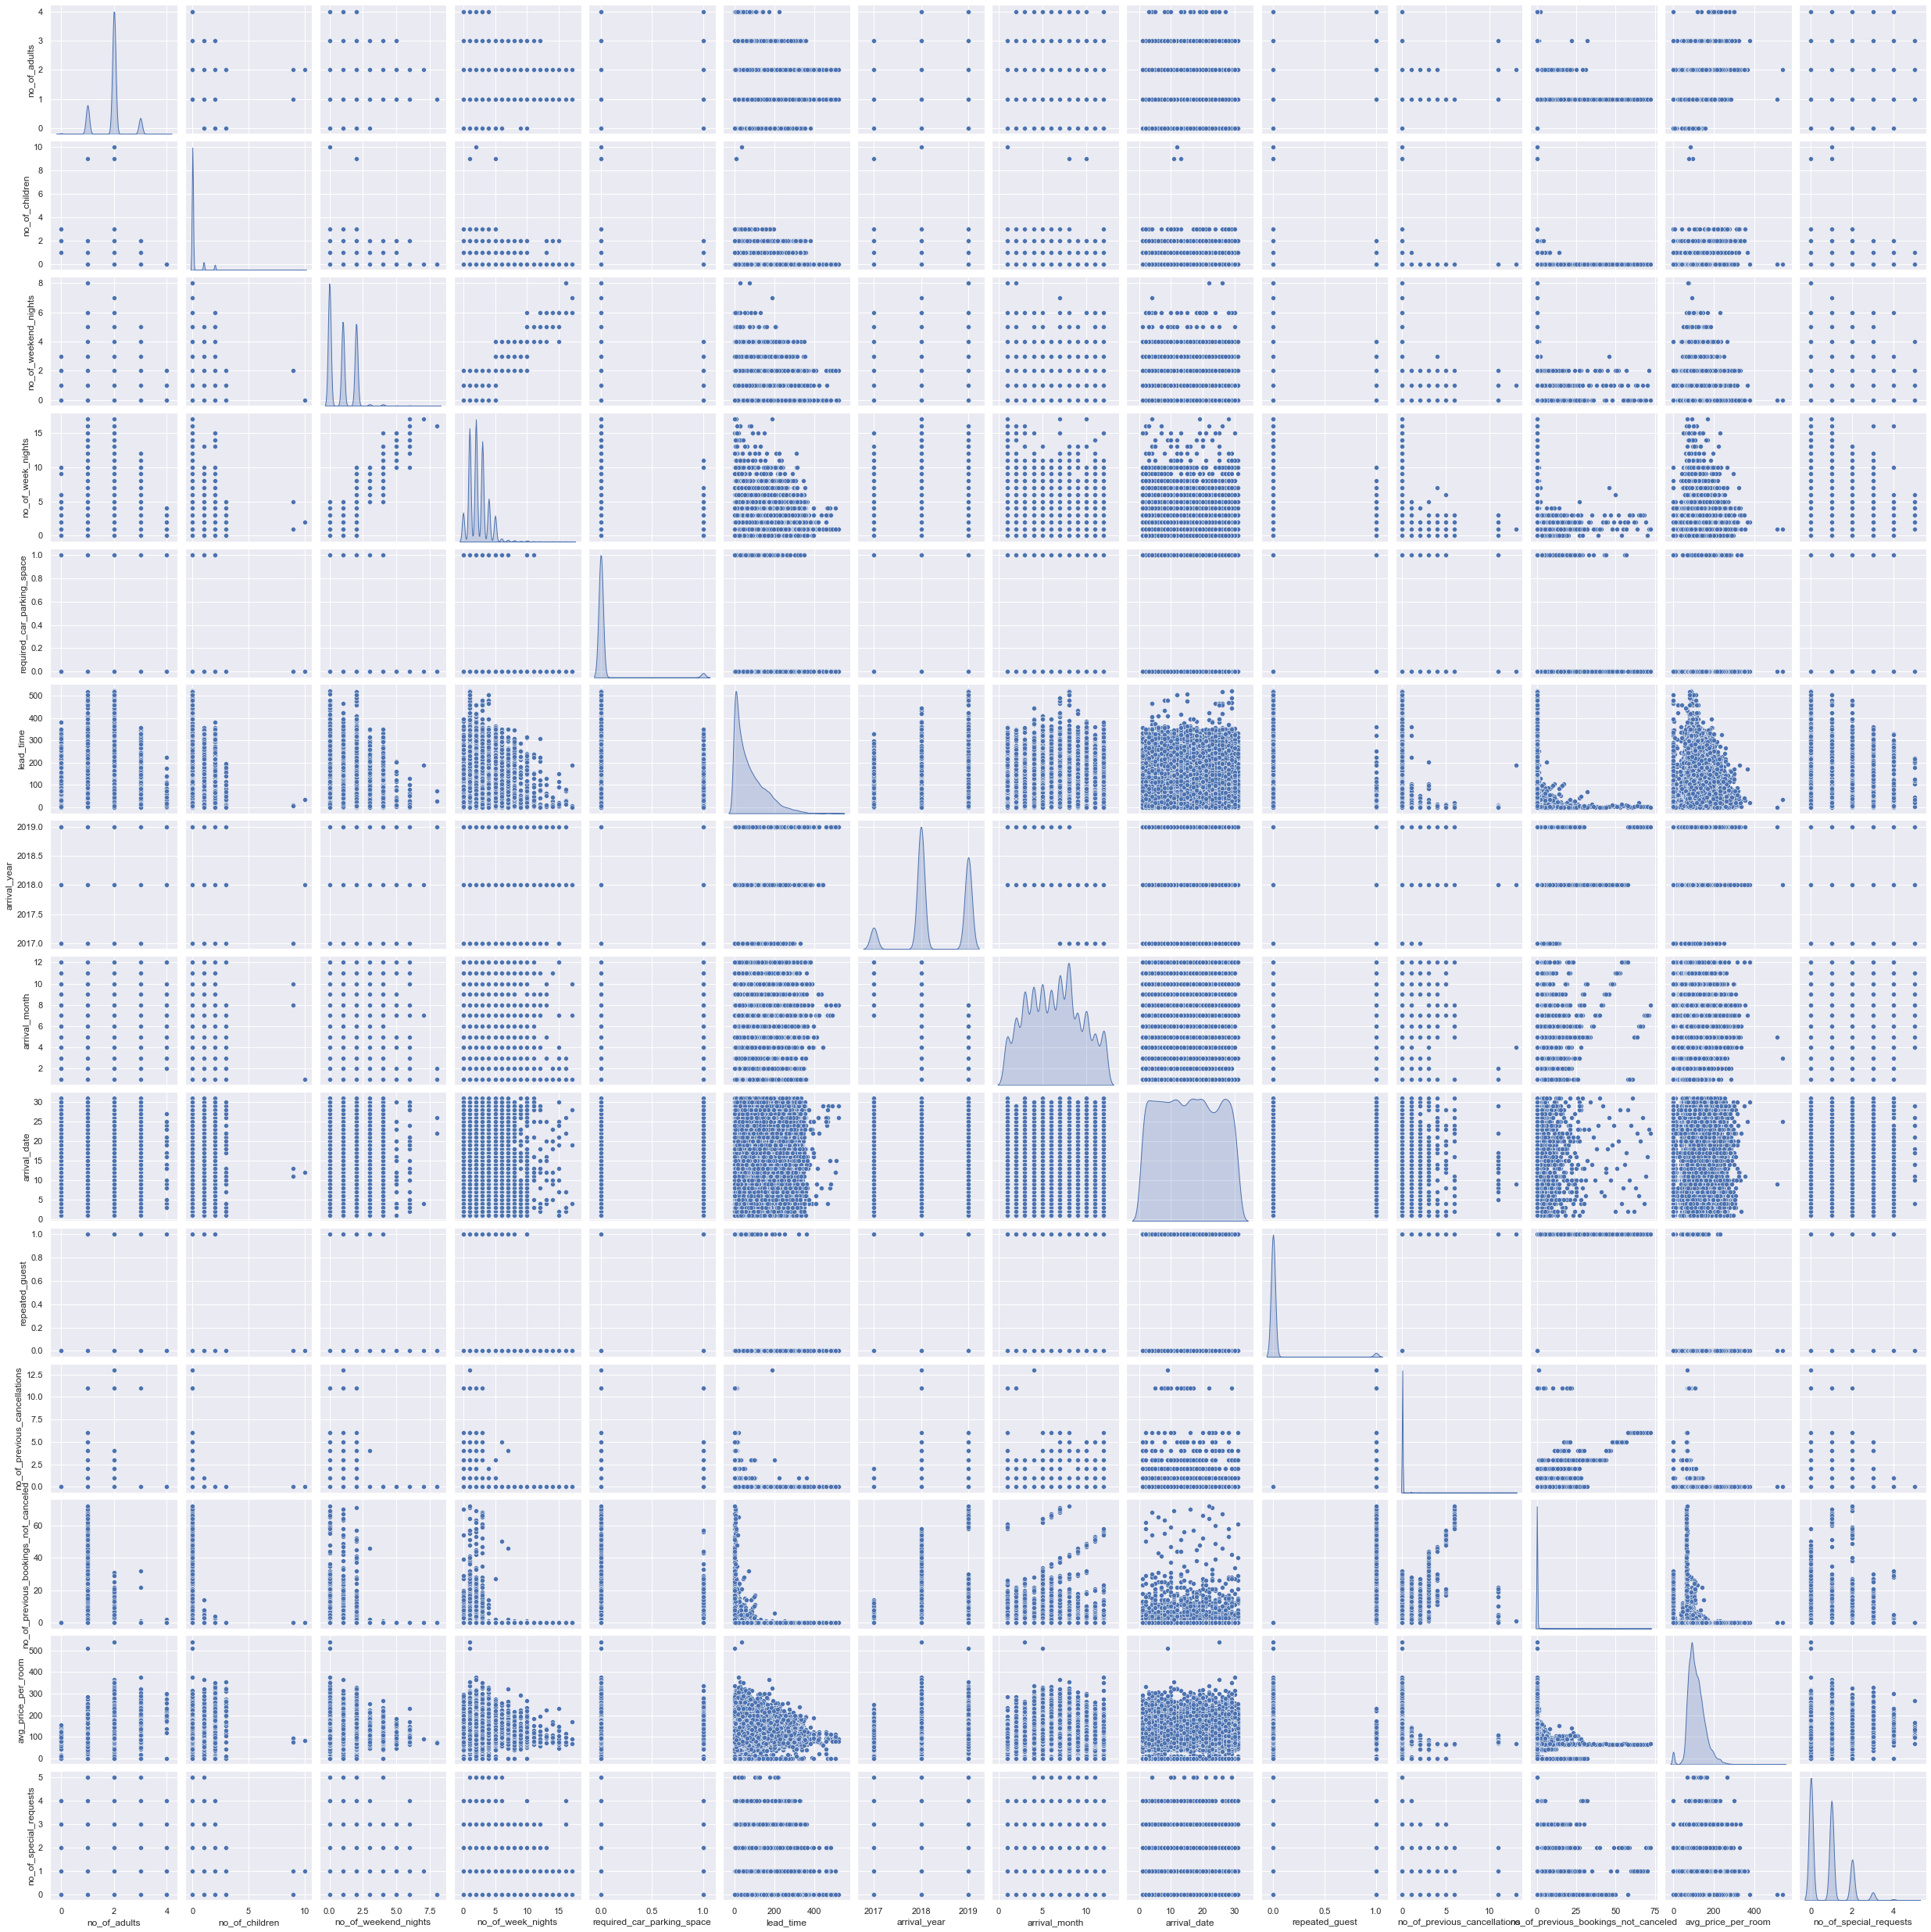

<IPython.core.display.Javascript object>

In [1115]:
# Pairplot to look at distributions and scatterplots
sns.set(rc={"figure.figsize": (16, 9)})
sns.pairplot(df, diag_kind="kde")
plt.show()

* Various distributions but none visually indicative of correlation
* Avg price of rooms has a somewhat normal distribution with a right skew

In [1116]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [1117]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

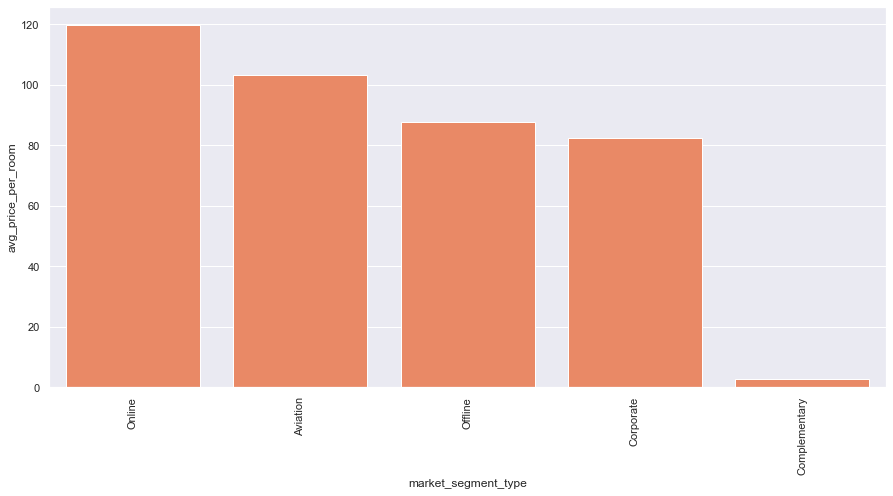

<IPython.core.display.Javascript object>

In [1118]:
plt.figure(figsize=(15, 7))  # To resize the plot
sns.barplot(
    data=df,
    x="market_segment_type",
    y="avg_price_per_room",
    ci=None,
    color="coral",
    order=df.groupby("market_segment_type")
    .avg_price_per_room.mean()
    .sort_values(ascending=False)
    .index,
)
plt.xticks(rotation=90)  # To rotate the x axis lables
plt.show()

* The avg price for Online (the predominant market) is highest compared to the other markets
* Aviation is next with a little over 100 as the mean
* Mean cost in the markets varies within 40 (matching std dev.)

In [1119]:
# Check averages of each market
markets = (
    df.groupby(by=["market_segment_type"])["avg_price_per_room"]
    .mean()
    .to_frame()
    .reset_index()
)
markets.sort_values(by="avg_price_per_room")

market_segment_type  avg_price_per_room
1       Complementary             2.77304
2           Corporate            82.48609
3             Offline            87.67533
0            Aviation           103.23426
4              Online           119.89128

<IPython.core.display.Javascript object>

* Online prices have the highest mean 
* Aviation has a difference of ~20 (lower)
* Offline is ~15 lower than aviation with Corporate ~20 lower than aviation
* Complementary is nearly free (as expected)

In [1120]:
# Create a subset of only the online market type
df_Online = df[df.market_segment_type == "Online"]
df_Online.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   
5             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   
5      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   
5          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            89.10000   
5                                     0            94.50000   

   no_of_special_requests booking_status  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled  
5                       0       Canceled

<IPython.core.display.Javascript object>

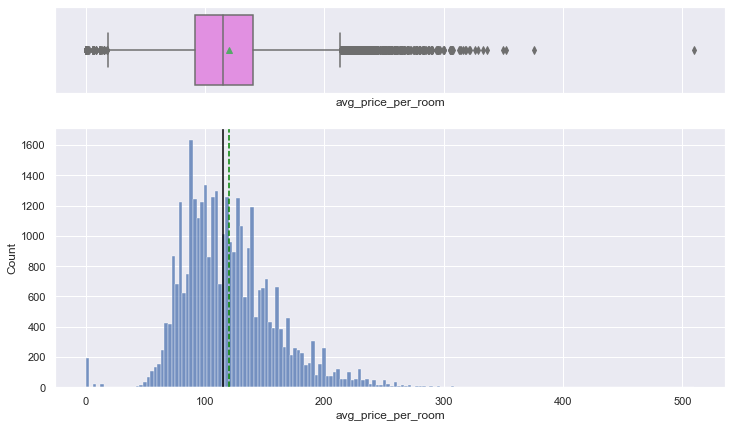

<IPython.core.display.Javascript object>

In [1121]:
# Plot of only Online Market avg prices
histogram_boxplot(df_Online, "avg_price_per_room")

* Normal distribution with some right skewness
* Some decent variability within the prices of online market but most are less than 200

In [1122]:
# Create a subset of only the Aviation market type
df_Aviation = df[df.market_segment_type == "Aviation"]
df_Aviation.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
44               1               0                     0                  2   
2307             1               0                     0                  1   
3483             1               0                     1                  0   
3521             1               0                     1                  3   
3560             1               0                     5                 10   

     type_of_meal_plan  required_car_parking_space room_type_reserved  \
44         Meal Plan 1                           0        Room_Type 4   
2307       Meal Plan 1                           0        Room_Type 4   
3483       Meal Plan 1                           0        Room_Type 1   
3521       Meal Plan 1                           0        Room_Type 1   
3560       Meal Plan 1                           0        Room_Type 1   

      lead_time  arrival_year  arrival_month  arrival_date  \
44            2          2018              5            19   
2307         20          2018              5            26   
3483          0          2019              6            12   
3521          3          2019              4             3   
3560         11          2018              5             9   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
44              Aviation               0                             0   
2307            Aviation               0                             0   
3483            Aviation               1                             0   
3521            Aviation               0                             0   
3560            Aviation               0                             0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
44                                       0           110.00000   
2307                                     0           110.00000   
3483                                     1            95.00000   
3521                                     0           103.50000   
3560                                     0            95.00000   

      no_of_special_requests booking_status  
44                         0       Canceled  
2307                       0       Canceled  
3483                       0   Not_Canceled  
3521                       0       Canceled  
3560                       0       Canceled

<IPython.core.display.Javascript object>

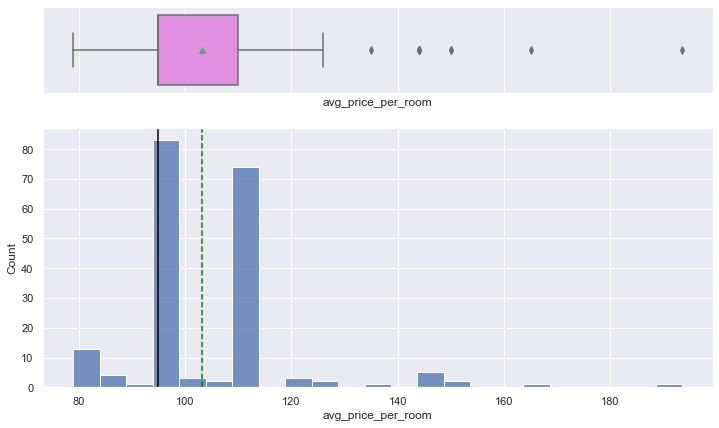

<IPython.core.display.Javascript object>

In [1123]:
# Plot of only Aviation Market avg prices
histogram_boxplot(df_Aviation, "avg_price_per_room")

* Not a normal distribution in Aviation
* Almost all room prices fall into 2 price categories 
* Small variability

In [1124]:
# Create a subset of only the Offline market type
df_Offline = df[df.market_segment_type == "Offline"]
df_Offline.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              2               0                     1                  2   
9              2               0                     0                  4   
11             3               0                     0                  4   
23             1               0                     1                  0   
28             2               0                     1                  0   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
0        Meal Plan 1                           0        Room_Type 1   
9        Meal Plan 1                           0        Room_Type 1   
11       Meal Plan 1                           0        Room_Type 1   
23       Meal Plan 1                           0        Room_Type 1   
28       Meal Plan 1                           0        Room_Type 1   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
0         224          2017             10             2             Offline   
9         133          2019              4            19             Offline   
11        121          2018              7             6             Offline   
23          0          2017             10             5             Offline   
28         12          2017             10             4             Offline   

    repeated_guest  no_of_previous_cancellations  \
0                0                             0   
9                0                             0   
11               0                             0   
23               0                             0   
28               0                             0   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                      0            65.00000   
9                                      0           124.00000   
11                                     0            96.90000   
23                                     0            96.00000   
28                                     0            72.00000   

    no_of_special_requests booking_status  
0                        0   Not_Canceled  
9                        0   Not_Canceled  
11                       1   Not_Canceled  
23                       0   Not_Canceled  
28                       0   Not_Canceled

<IPython.core.display.Javascript object>

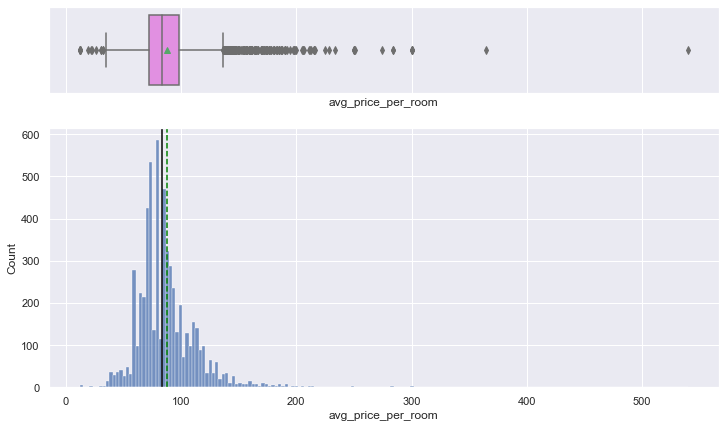

<IPython.core.display.Javascript object>

In [1125]:
# Plot of only Offline Market avg prices
histogram_boxplot(df_Offline, "avg_price_per_room")

* Similar look to Offline as Online with normal distribution and right skewness
* Most values lie  between 80 and 150

In [1126]:
# Create a subset of only the Corporate market type
df_Corporate = df[df.market_segment_type == "Corporate"]
df_Corporate.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18              1               0                     0                  3   
30              1               0                     0                  1   
76              2               0                     2                  6   
84              2               0                     1                  0   
131             1               0                     2                  6   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
18        Meal Plan 1                           0        Room_Type 1   
30        Meal Plan 1                           0        Room_Type 1   
76        Meal Plan 1                           0        Room_Type 1   
84        Meal Plan 1                           0        Room_Type 4   
131       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
18          69          2019              4             6           Corporate   
30         122          2018             11            25           Corporate   
76         182          2019              3            11           Corporate   
84          20          2019              5            14           Corporate   
131        182          2019              3            11           Corporate   

     repeated_guest  no_of_previous_cancellations  \
18                0                             0   
30                0                             0   
76                0                             0   
84                0                             0   
131               0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
18                                      0            85.00000   
30                                      0            67.00000   
76                                      0            90.00000   
84                                      0           110.00000   
131                                     0            80.00000   

     no_of_special_requests booking_status  
18                        0       Canceled  
30                        0   Not_Canceled  
76                        1   Not_Canceled  
84                        0       Canceled  
131                       0   Not_Canceled

<IPython.core.display.Javascript object>

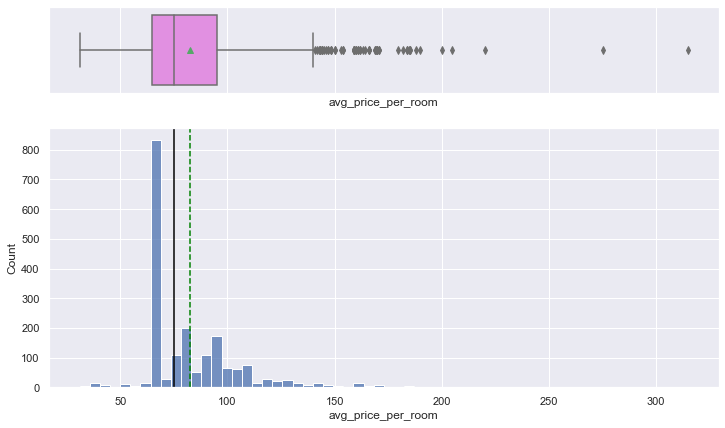

<IPython.core.display.Javascript object>

In [1127]:
# Plot of only Corporate Market avg prices
histogram_boxplot(df_Corporate, "avg_price_per_room")

* Similar to Aviation (makes sense both would be purchased via company travel)
* Most values fall into 1 price but some right skewness

In [1128]:
# Create a subset of only the Complementary market type
df_Complementary = df[df.market_segment_type == "Complementary"]
df_Complementary.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
98              1               0                     0                  1   
129             1               0                     2                  0   
226             1               0                     0                  2   
324             1               0                     0                  0   
407             1               0                     0                  2   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
98        Meal Plan 1                           0        Room_Type 1   
129       Meal Plan 1                           0        Room_Type 1   
226       Meal Plan 1                           0        Room_Type 1   
324       Meal Plan 1                           0        Room_Type 1   
407       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
98           2          2017              9            10       Complementary   
129         17          2019              5            28       Complementary   
226         13          2018              6             1       Complementary   
324          4          2018              2            27       Complementary   
407          1          2017              8            12       Complementary   

     repeated_guest  no_of_previous_cancellations  \
98                0                             0   
129               1                             0   
226               1                             3   
324               0                             0   
407               1                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
98                                      0             0.00000   
129                                     3             0.00000   
226                                     5             0.00000   
324                                     0             0.00000   
407                                     1             0.00000   

     no_of_special_requests booking_status  
98                        1   Not_Canceled  
129                       1   Not_Canceled  
226                       1   Not_Canceled  
324                       1   Not_Canceled  
407                       1   Not_Canceled

<IPython.core.display.Javascript object>

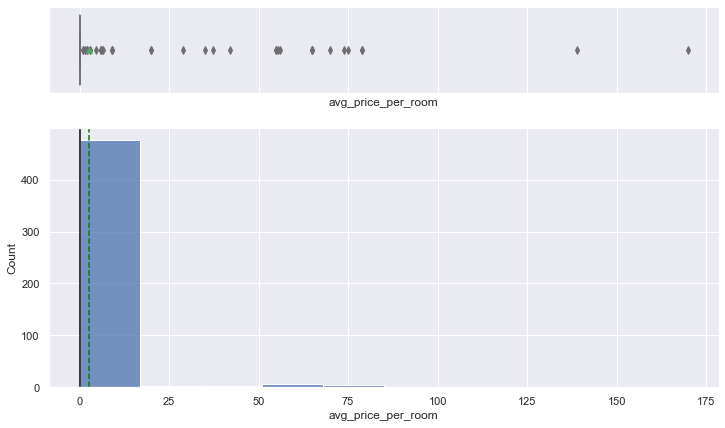

<IPython.core.display.Javascript object>

In [1129]:
# Plot of only Complementary Market avg prices
histogram_boxplot(df_Complementary, "avg_price_per_room")

* Complementary as expected, most values at 0

* In answer to the question on differences within markets, Online market has the highest averages with the other market averages within 40 (except complementary)
* Online and offline market both have similar distributions and differences within market
* Aviation and Corporate have bucket type averages
* Complementary is mostly 0

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
Not_Canceled            10476  11225  4992  1230  150  16  28089
All                     19228  15571  6381  1230  150  16  42576
Canceled                 8752   4346  1389     0    0   0  14487
------------------------------------------------------------------------------------------------------------------------


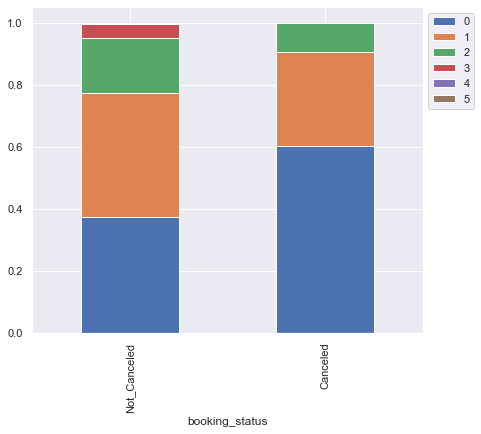

<IPython.core.display.Javascript object>

In [1130]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df, "booking_status", "no_of_special_requests")

* The guests with 0 special requests are the highest count for cancelled 
* Guests with 1 special request have the highest count for not cancelled though 0 requests is very close in count
* Of note, guests with 3, 4, or 5 requests have 0 cancellations; More special requests less likely to cancel

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [1131]:
# Create a subset of only the repeat guest
df_repeat = df[df.repeated_guest == 1]
df_repeat.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
26              1               0                     0                  2   
129             1               0                     2                  0   
136             2               0                     0                  1   
179             1               0                     0                  1   
197             1               0                     0                  2   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
26        Meal Plan 1                           0        Room_Type 4   
129       Meal Plan 1                           0        Room_Type 1   
136      Not Selected                           0        Room_Type 1   
179       Meal Plan 1                           1        Room_Type 1   
197       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
26          54          2019              3            22              Online   
129         17          2019              5            28       Complementary   
136         17          2018             12            10              Online   
179         14          2019              8            31           Corporate   
197          5          2019              1            10           Corporate   

     repeated_guest  no_of_previous_cancellations  \
26                1                             0   
129               1                             0   
136               1                             0   
179               1                             0   
197               1                             3   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
26                                      3            78.31000   
129                                     3             0.00000   
136                                     5            95.00000   
179                                     3            67.00000   
197                                    24            65.00000   

     no_of_special_requests booking_status  
26                        1   Not_Canceled  
129                       1   Not_Canceled  
136                       0   Not_Canceled  
179                       2   Not_Canceled  
197                       0   Not_Canceled

<IPython.core.display.Javascript object>

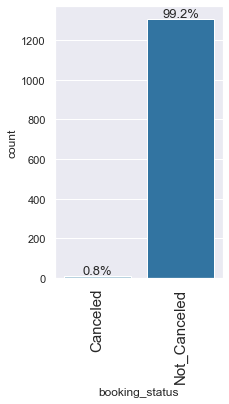

<IPython.core.display.Javascript object>

In [1132]:
labeled_barplot(df_repeat, "booking_status", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Only 0.8% of repeat guests cancelled...very low percentage

8. What is the predominant month for repeat guests?

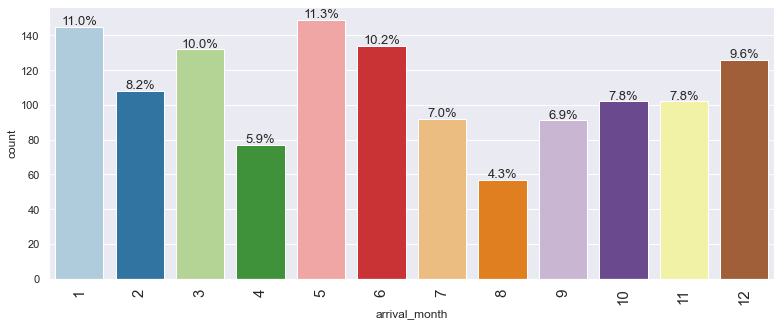

<IPython.core.display.Javascript object>

In [1133]:
labeled_barplot(df_repeat, "arrival_month", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Interestingly, repeat guests are more uniform on the months of arrival
* Plus the off season for most guest (winter months) has a high percentage of repeat guests

7. What is the predominant room type and meal type selected by repeat guests?

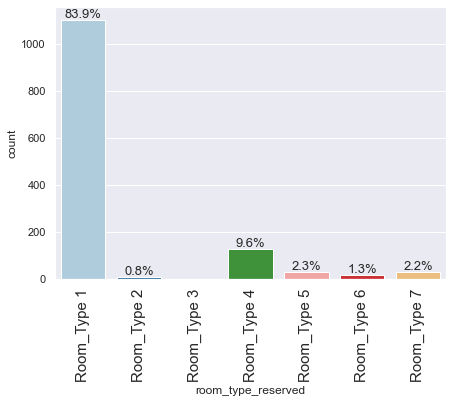

<IPython.core.display.Javascript object>

In [1134]:
labeled_barplot(df_repeat, "room_type_reserved", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

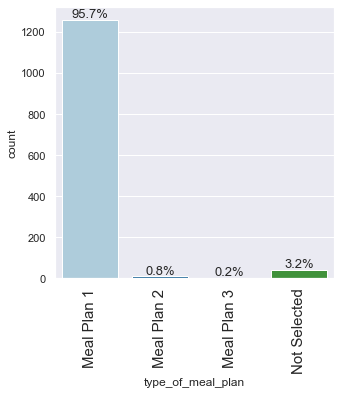

<IPython.core.display.Javascript object>

In [1135]:
labeled_barplot(df_repeat, "type_of_meal_plan", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Repeat guests choose meal plan 1 95% of the time
* Repeat guests choose Room Type 1 84% and Room type 4 10% of the time

11. Is there a higher avg cost based on month of the year of arrival? 

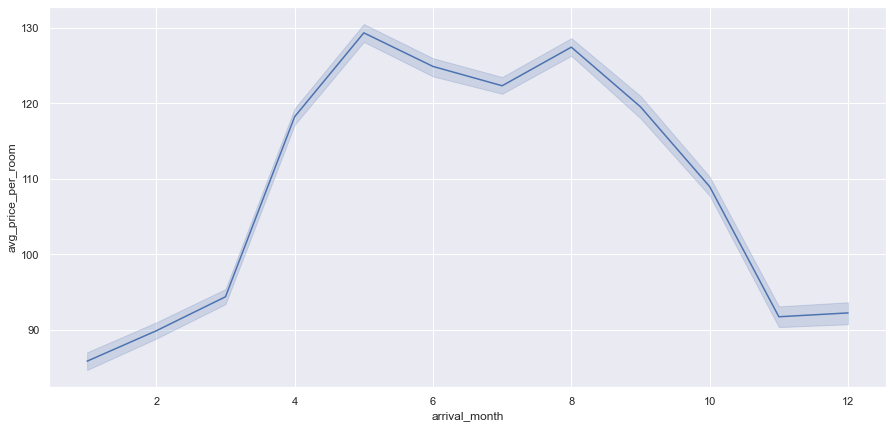

<IPython.core.display.Javascript object>

In [1136]:
# Want to see by year the used price separated out by 4g
plt.figure(figsize=(15, 7))
sns.lineplot(x=df["arrival_month"], y=df["avg_price_per_room"])
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* It does show that the price goes up when the highest arrival months are, summer and spring
* Repeat guests would be happy with the lower prices on off months 

9. Do people who book with kids cancel more than guest without since kids add complexity to travel plans?

In [1137]:
# Create a subset of only the guests with children
df_kid = df[df.no_of_children > 0]
df_kid.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
42             2               1                     0                  3   
45             2               2                     0                  3   
50             2               1                     2                  4   
54             0               2                     0                  3   
94             2               2                     0                  1   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
42       Meal Plan 1                           0        Room_Type 1   
45       Meal Plan 1                           0        Room_Type 6   
50       Meal Plan 1                           0        Room_Type 1   
54       Meal Plan 1                           0        Room_Type 2   
94       Meal Plan 1                           1        Room_Type 6   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
42        139          2019              4            12              Online   
45        195          2019              8            16              Online   
50        173          2019              8            17              Online   
54         56          2018             12             7              Online   
94          2          2018              9             2              Online   

    repeated_guest  no_of_previous_cancellations  \
42               0                             0   
45               0                             0   
50               0                             0   
54               0                             0   
94               0                             0   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
42                                     0           141.00000   
45                                     0           235.00000   
50                                     0           137.85000   
54                                     0            82.44000   
94                                     0           258.00000   

    no_of_special_requests booking_status  
42                       2   Not_Canceled  
45                       0       Canceled  
50                       0       Canceled  
54                       1   Not_Canceled  
94                       1   Not_Canceled

<IPython.core.display.Javascript object>

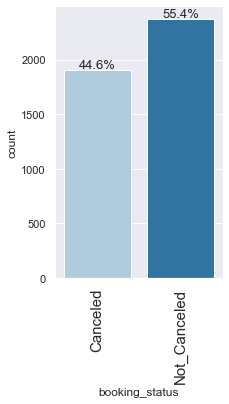

<IPython.core.display.Javascript object>

In [1138]:
labeled_barplot(df_kid, "booking_status", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* There is a higher percentage of cancelled with guests with children at 44.6% compared to other features comparison
* Though the percentage of guests with kids that didn't cancel is slightly higher, 55.4%

12. Is there a higher avg cost associated with room type?

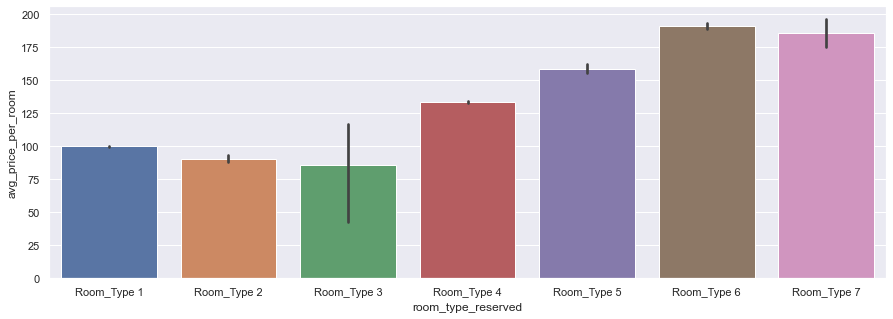

<IPython.core.display.Javascript object>

In [1139]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")
plt.show()

* There are some differences in room type and avg room price
* The most popular choice avg's ~100
* Room type 3 has the most variability within
* Room type 4 has a higher cost and is second highest with repeat customers; perhaps a better room

### Would like to look at some multivariate charts in respect to booking status

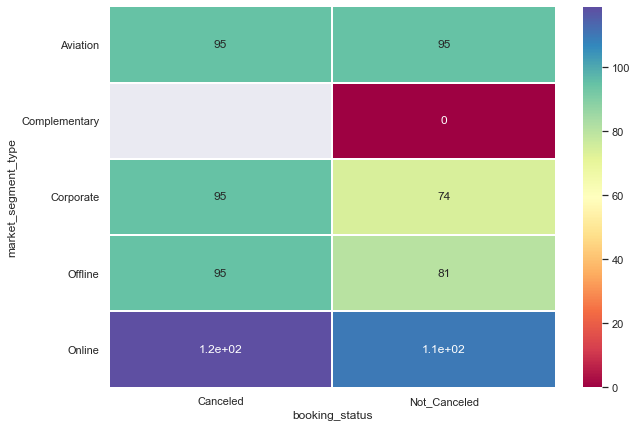

<IPython.core.display.Javascript object>

In [1140]:
# Market type vs booking status vs avg room price heat map
df_hm = df.pivot_table(
    index="market_segment_type",
    columns="booking_status",
    values="avg_price_per_room",
    aggfunc=np.median,
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
    df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax,
)
plt.show()

* Higher average price on online for cancelled rooms 
* Higher average room price on each market segment for cancelled except aviation (and complementary which has no cancels)

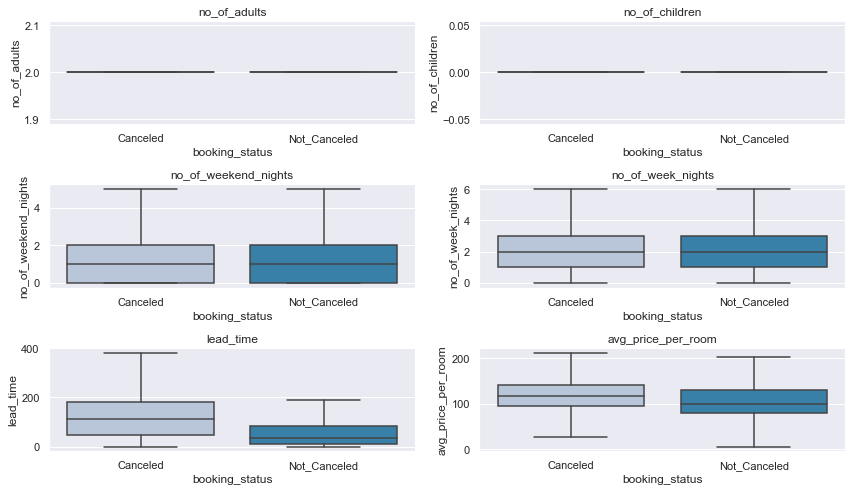

<IPython.core.display.Javascript object>

In [1141]:
cols = df[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "lead_time",
        "avg_price_per_room",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["booking_status"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There is a difference in lead time, less lead time less cancelled
* The rest of the features are pretty similar

### Summary
•	34 % of guests cancel their booking

•	The busiest months are the warmer months, 8, 7, 5, 4, 6, 3

•	80% of guests book via online, then Offline at 14%

•	Most of the bookings consist of 2 adults (73%), then 1 adult at 17.1%

•	90% of guests do not bring children

•	Room prices are typically between 80 and 150 euros

•	Typically there is no lead time to booking and arrival (short notice bookings)

•	Most bookings include a weekend night, 57%

•	And week nights of 1-3, 76% within this range

•	Meal Plan 1 75%, or not selected 21% are most selected choices…other meal plans less than 5%

•	Room type 1, 70%, and room type 4 , 22 %, are predominant room types book

•	97% of bookings do not request a parking space

•	99% of guests do not have previous cancellations and 97% of guests had 0 previous bookings cancelled – These are also the highest correlated features at 0.58

•	Special requests range between 0-2, 97%

•	Only 3.1% of bookings are repeat users of Star Hotels, repeat guests also have a positive correlation of 0.56 in regards to previous bookings not cancelled

•	The avg room prices are higher in Online and Aviation Markets with variation in room prices in Online but standard prices in Aviation Market

•	Guests with no special requests have the highest count for cancellations compared to the other special request values and if >3 no cancellations 

•	99.2% of repeat guests do not cancel and repeat guests favor all months but favor off season months Jan, Feb, March the on season months of May and June are also high but the highest month of all guests is lowest for repeat guests at 4%

•	Repeat guests also favour room type 1, 4 and meal plan 1; same as the full dataset

•	The highest avg cost of rooms is between April and October

•	Guests with children cancel 45% of bookings with children

•	Room Type 1 has lowest variation and ~100 euros, Room type 4 the next highest booked is slightly higher at ~130 euros; both have low variation bars, Room type 3 has a large variation line

•	Slightly higher prices in cancelled rooms versus not cancelled, 10 euros; No cancellations for complementary rooms

•	Cancelled bookings have a broader and higher lead times to bookings compared to not cancelled

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

* Should not have missing values BUT a lot of the 0's are questionable...
* Will look at the 0's first for potential data issues

In [1142]:
# Create df of rows that have 0's in weekend nights and week nights
no_of_zeros = df.loc[(df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)]
no_of_zeros.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
324              1               0                     0                  0   
399              1               0                     0                  0   
1795             2               0                     0                  0   
2159             3               0                     0                  0   
2971             2               0                     0                  0   

     type_of_meal_plan  required_car_parking_space room_type_reserved  \
324        Meal Plan 1                           0        Room_Type 1   
399        Meal Plan 1                           0        Room_Type 1   
1795       Meal Plan 1                           0        Room_Type 1   
2159       Meal Plan 1                           0        Room_Type 4   
2971       Meal Plan 2                           0        Room_Type 1   

      lead_time  arrival_year  arrival_month  arrival_date  \
324           4          2018              2            27   
399          23          2019              1            11   
1795        145          2018              7             5   
2159         57          2018              4             1   
2971        247          2018              6             6   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
324        Complementary               0                             0   
399               Online               0                             0   
1795              Online               0                             0   
2159              Online               0                             0   
2971              Online               0                             0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
324                                      0             0.00000   
399                                      0             0.00000   
1795                                     0             0.00000   
2159                                     0             0.00000   
2971                                     0             0.00000   

      no_of_special_requests booking_status  
324                        1   Not_Canceled  
399                        2   Not_Canceled  
1795                       1   Not_Canceled  
2159                       2   Not_Canceled  
2971                       1   Not_Canceled

<IPython.core.display.Javascript object>

* Several rows have 0's for both weekend and week nights
* Though there are definite data points in the rest of the columns of these rows, so for some reason the days were not entered

In [1143]:
# Look at unique values to get an idea what else is 0
no_of_zeros.nunique().sort_values(ascending=False)

lead_time                               49
arrival_date                            29
arrival_month                           12
room_type_reserved                       6
no_of_special_requests                   4
no_of_previous_bookings_not_canceled     4
arrival_year                             3
no_of_children                           3
no_of_adults                             3
type_of_meal_plan                        3
market_segment_type                      2
repeated_guest                           2
no_of_previous_cancellations             2
booking_status                           2
required_car_parking_space               1
no_of_week_nights                        1
avg_price_per_room                       1
no_of_weekend_nights                     1
dtype: int64

<IPython.core.display.Javascript object>

* required parking is not odd to be 0
* but avg price per room at 0 with # of week days and week ends all at 0 show the number of nights may not have been entered because the room  was complementary...disregard, several were Online from head()

In [1144]:
# How many rows are we looking at here
no_of_zeros.value_counts().sum(axis=0)

99

<IPython.core.display.Javascript object>

* 99 rows, definitely feel like these should be dropped from the df

In [1145]:
df1 = df.drop(
    df[(df["no_of_weekend_nights"] == 0) & (df["no_of_week_nights"] == 0)].index
)
df1.value_counts().sum(axis=0)

42477

<IPython.core.display.Javascript object>

* 99 less than df was

In [1146]:
# Quick check to verify there are no bookings with 0 adults and 0 children
df1.loc[(df["no_of_adults"] == 0) & (df["no_of_children"] == 0)]

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

<IPython.core.display.Javascript object>

### Outlier detection

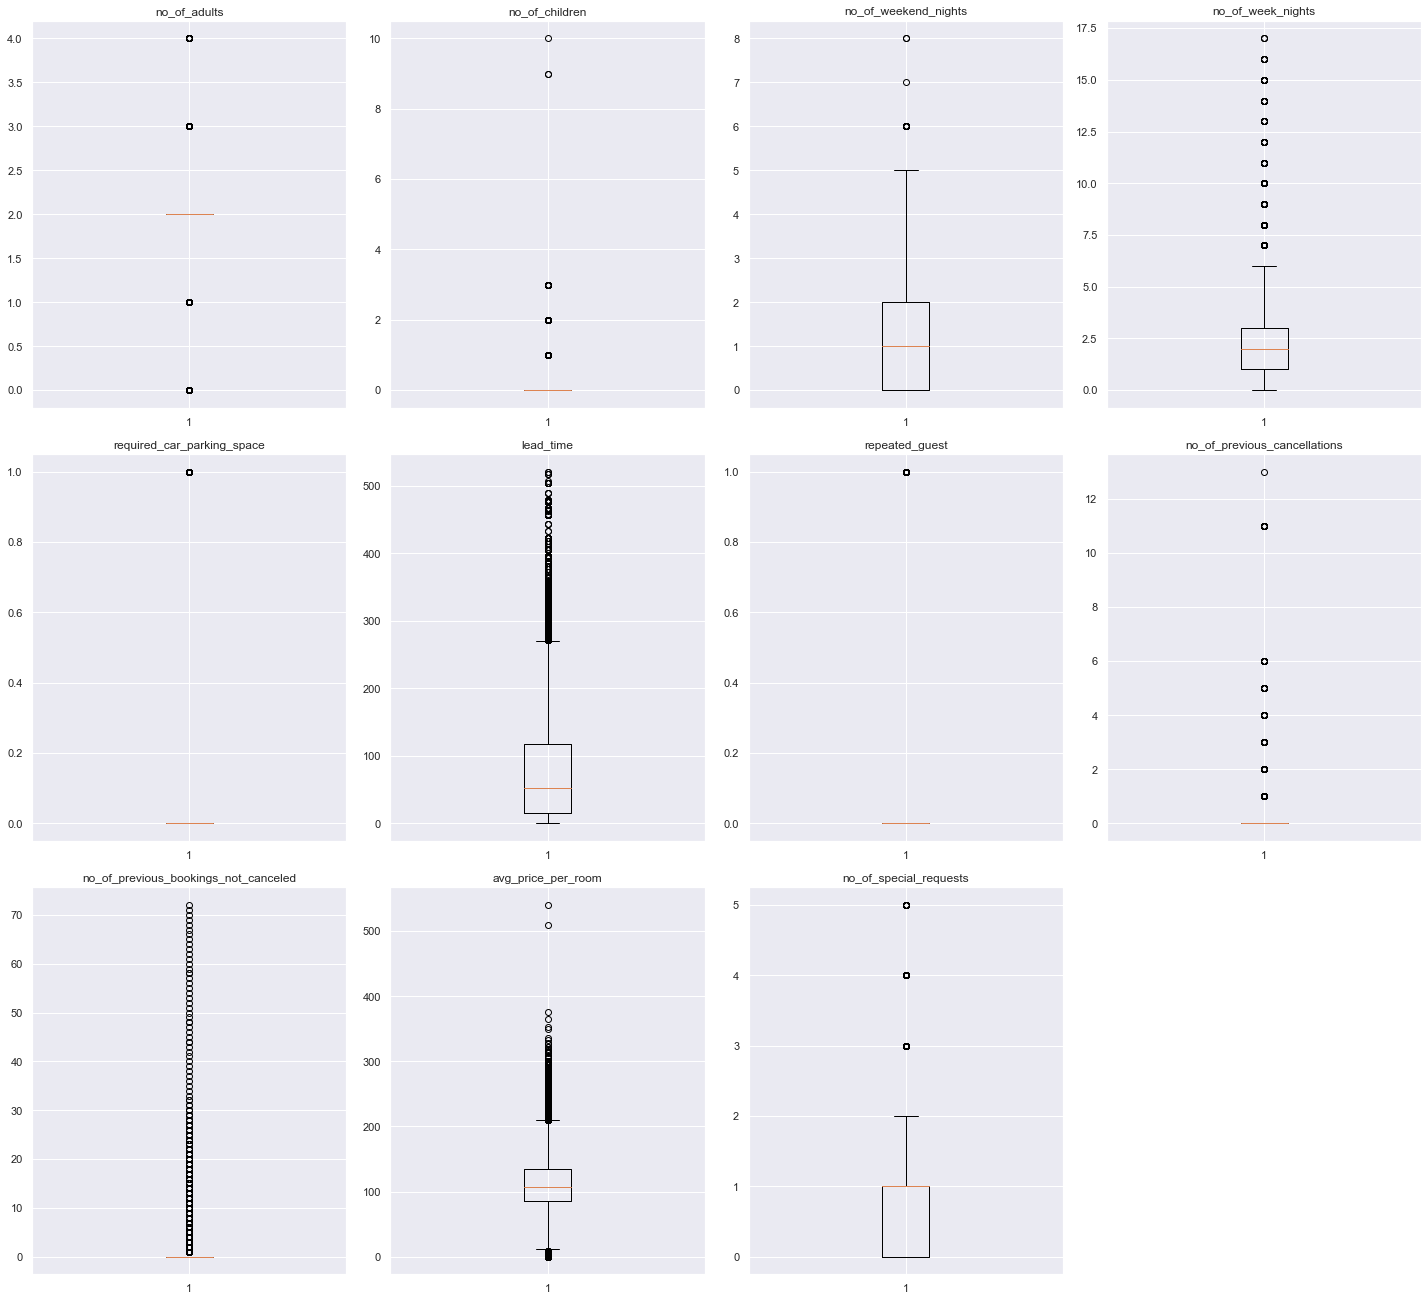

<IPython.core.display.Javascript object>

In [1147]:
# let's plot the boxplots of all columns to check for outliers

numeric_columns1 = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns1.remove(
    "arrival_year"
)  # dropping year column as it is temporal variable
numeric_columns1.remove(
    "arrival_month"
)  # dropping month column as it is temporal variable
numeric_columns1.remove("arrival_date")

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns1):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* See some outliers that were wondered at in the EDA, week day, weekend, avg price per room, special requests

In [1148]:
# Functions to identify and treat outliers from course content (MLS)
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [1149]:
# treating the outliers
df2 = treat_outliers(df1, "no_of_weekend_nights")
df2 = treat_outliers(df1, "no_of_week_nights")
df2 = treat_outliers(df1, "avg_price_per_room")
df2 = treat_outliers(df1, "lead_time")

<IPython.core.display.Javascript object>

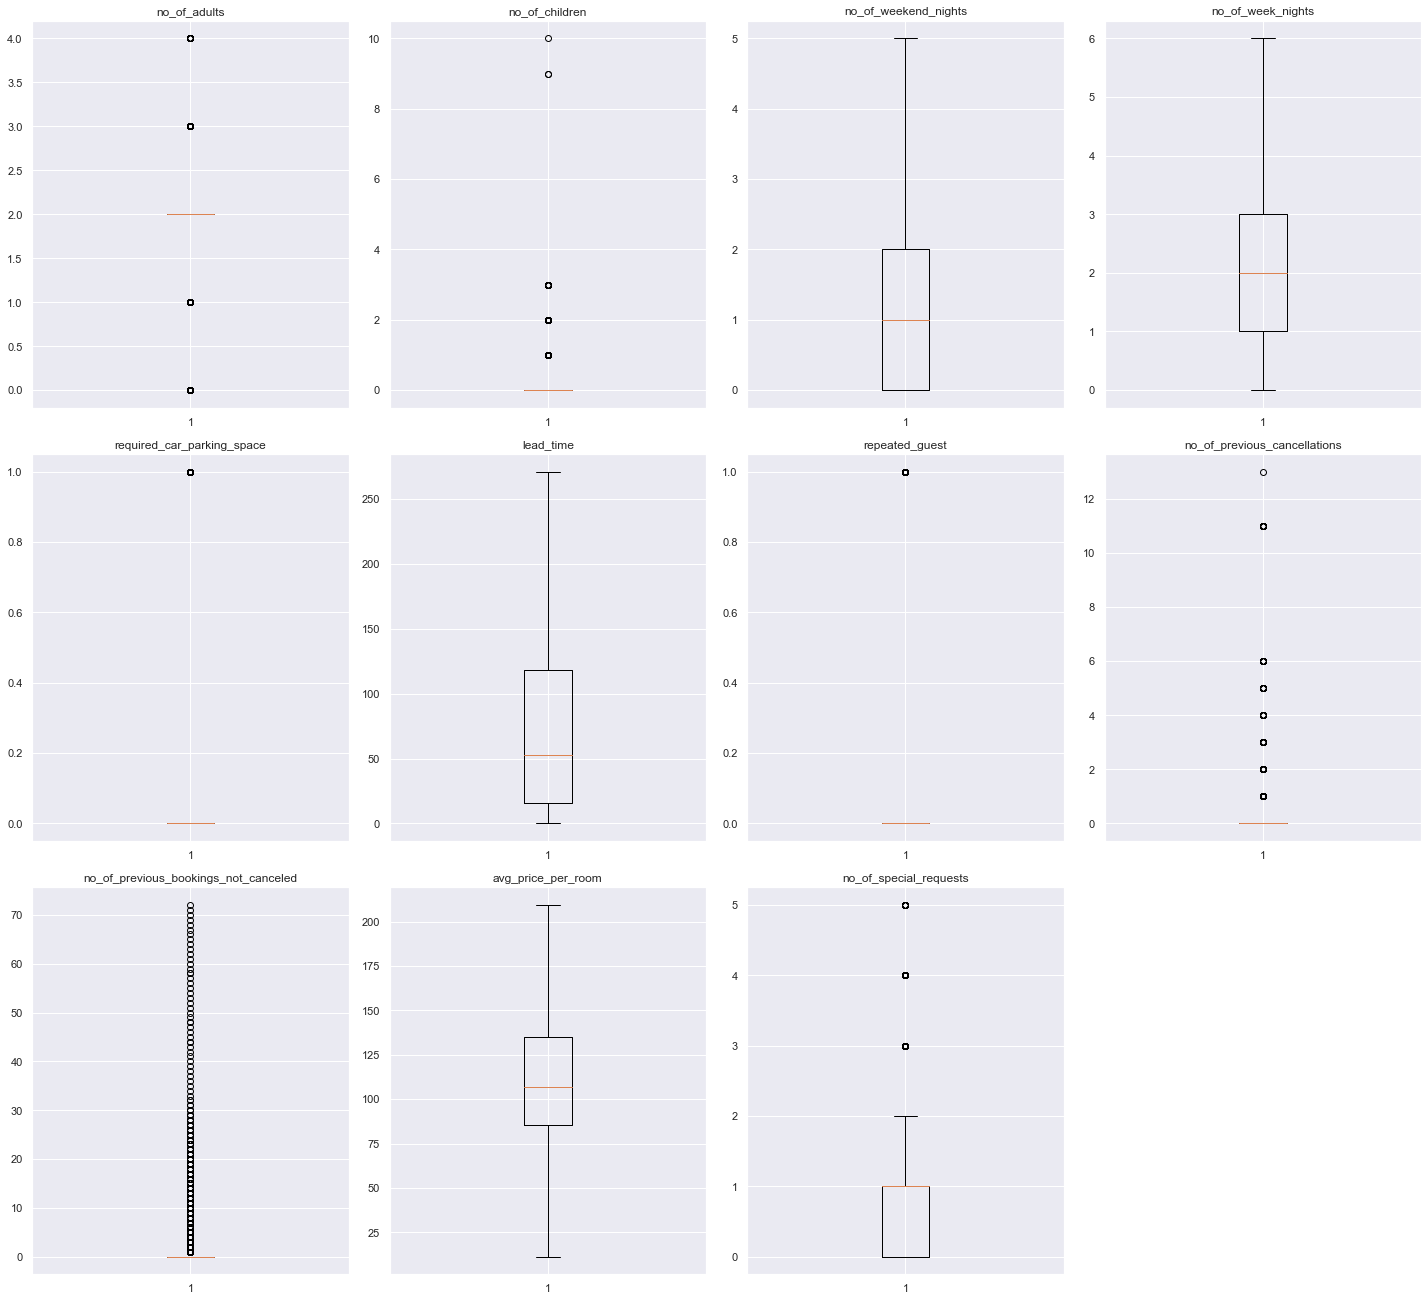

<IPython.core.display.Javascript object>

In [1150]:
numeric_columns2 = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns2.remove(
    "arrival_year"
)  # dropping year column as it is temporal variable
numeric_columns2.remove(
    "arrival_month"
)  # dropping month column as it is temporal variable
numeric_columns2.remove("arrival_date")

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns2):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* The treated outlier boxplots look much better
* Can't treat no_of_previous bookings not cancelled and no of previous cancellations because the IQR is 0

In [1151]:
# Look at unique values to get an idea what else is 0
df2.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       6
no_of_week_nights                          7
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                272
arrival_year                               3
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      73
avg_price_per_room                      4597
no_of_special_requests                     6
booking_status                             2
dtype: int64

<IPython.core.display.Javascript object>

In [1152]:
# Just want to take a look at previous bookings over 50 to see if it makes sense
df2.loc[(df2["no_of_previous_bookings_not_canceled"] >= 50)]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
934               1               0                     0                  3   
2042              1               0                     0                  3   
2511              1               0                     2                  6   
6588              1               0                     1                  2   
6722              1               0                     0                  2   
7619              1               0                     1                  2   
10169             1               0                     1                  3   
11935             1               0                     0                  3   
12204             1               0                     2                  3   
14948             1               0                     0                  3   
15613             1               0                     0                  3   
17089             1               0                     1                  2   
18520             1               0                     0                  3   
26470             1               0                     2                  1   
27005             1               0                     2                  1   
29552             1               0                     0                  2   
31243             1               0                     0                  1   
34331             1               0                     2                  1   
35415             1               0                     0                  2   
40309             1               0                     1                  0   
43961             1               0                     1                  0   
46404             1               0                     0                  2   
49547             1               0                     1                  1   
53569             1               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
934         Meal Plan 1                           0        Room_Type 1   
2042        Meal Plan 1                           0        Room_Type 1   
2511        Meal Plan 1                           0        Room_Type 1   
6588        Meal Plan 1                           0        Room_Type 1   
6722        Meal Plan 1                           0        Room_Type 1   
7619        Meal Plan 1                           0        Room_Type 1   
10169       Meal Plan 1                           0        Room_Type 1   
11935       Meal Plan 1                           0        Room_Type 1   
12204       Meal Plan 1                           0        Room_Type 1   
14948       Meal Plan 1                           0        Room_Type 1   
15613       Meal Plan 1                           0        Room_Type 1   
17089       Meal Plan 1                           0        Room_Type 1   
18520       Meal Plan 1                           0        Room_Type 1   
26470       Meal Plan 1                           0        Room_Type 1   
27005       Meal Plan 1                           0        Room_Type 1   
29552       Meal Plan 1                           1        Room_Type 1   
31243       Meal Plan 1                           0        Room_Type 1   
34331       Meal Plan 1                           1        Room_Type 1   
35415       Meal Plan 1                           0        Room_Type 1   
40309       Meal Plan 1                           0        Room_Type 1   
43961       Meal Plan 1                           0        Room_Type 1   
46404       Meal Plan 1                           0        Room_Type 1   
49547       Meal Plan 1                           0        Room_Type 1   
53569       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
934           20          2019              6             6   
2042           5          201

<IPython.core.display.Javascript object>

* The values are all corporate with a low price and different variables
* All are repeat guests, I think with a corporate booking this could take place depending on how often people travel
* However, with the data so extremely right skewed and only 0.3% of the data greater than 17 I am going to replace >17 with the most common value, 0

In [1153]:
# Replace all the values >17 with 0 the highest value in the column (by a lot)
df2.loc[
    (df2["no_of_previous_bookings_not_canceled"] > 17),
    ("no_of_previous_bookings_not_canceled"),
] = 0
# highest values imputation

df2[(df2["no_of_previous_bookings_not_canceled"] > 17)]  # check it

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

<IPython.core.display.Javascript object>

In [1154]:
# Just checking some things on complementary, want to decide to drop or not
df2[
    (df2["market_segment_type"] == "Complementary") & (df2["avg_price_per_room"] > 0)
]  # check it

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
98                1               0                     0                  1   
129               1               0                     2                  0   
226               1               0                     0                  2   
407               1               0                     0                  2   
410               1               0                     2                  1   
...             ...             ...                   ...                ...   
55728             1               0                     0                  1   
56462             2               0                     0                  1   
56471             1               0                     0                  1   
56624             1               0                     1                  1   
56757             1               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
98          Meal Plan 1                           0        Room_Type 1   
129         Meal Plan 1                           0        Room_Type 1   
226         Meal Plan 1                           0        Room_Type 1   
407         Meal Plan 1                           0        Room_Type 1   
410         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
55728       Meal Plan 1                           0        Room_Type 1   
56462       Meal Plan 1                           0        Room_Type 6   
56471       Meal Plan 1                           0        Room_Type 7   
56624       Meal Plan 1                           0        Room_Type 7   
56757       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
98             2          2017              9            10   
129           17          2019              5            28   
226           13          2018              6             1   
407            1          2017              8            12   
410            4          2017              8            23   
...          ...           ...            ...           ...   
55728          0          2019              8            23   
56462          4          2019              6             2   
56471          0          2018              6             7   
56624          0          2018              3            21   
56757          2          2017             11             9   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
98          Complementary               0                             0   
129         Complementary               1                             0   
226         Complementary               1                             3   
407         Complementary               1                             0   
410         Complementary               0                             0   
...                   ...             ...                           ...   
55728       Complementary               1                             5   
56462       Complementary               1                             4   
56471       Complementary               1                             4   
56624       Complementary               1                             3   
56757       Complementary               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
98                                        0            11.25000   
129                                       3            11.25000   
226                                       5            11.25000   
407                                       1            11.25000   
410                                       0            11.25000   
...                                     ...                 ...   
55728                         

<IPython.core.display.Javascript object>

In [1155]:
# Just checking some things on complementary, want to decide to drop or not
df2[
    (df2["market_segment_type"] == "Complementary")
    & (df2["avg_price_per_room"] > 0)
    & (df2["booking_status"] == "Canceled")
]  # check it

Empty DataFrame
Columns: [no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

<IPython.core.display.Javascript object>

* Values have different numbers in avg cost and other features, so believeable 
* None of them are cancelled, this may be a good info to keep in

## EDA

- It is a good idea to explore the data once again after manipulating it.

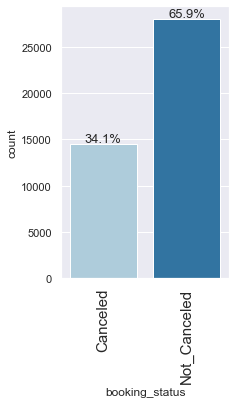

<IPython.core.display.Javascript object>

In [1299]:
# First want to visualize the planned predicted variable
labeled_barplot(df2, "booking_status", perc=True)
plt.savefig("BookingStatusBar.jpg", bbox_inches="tight")

* Not cancelled is at 65.9% (was 62%) with 34.1% (was ~40%) of guests cancelling
* Still Too high of a cancellation percentage for Star Hotels with this being high impact on various fronts; Though it's slightly better with the data processing

1. What are the busiest months in the hotel?

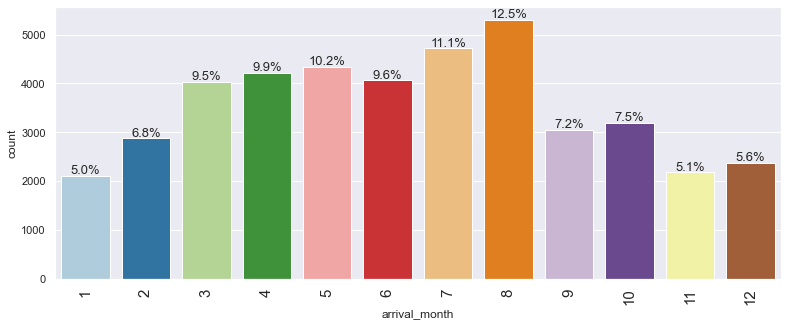

<IPython.core.display.Javascript object>

In [1298]:
labeled_barplot(df2, "arrival_month", perc=True)
plt.savefig("ArrivalMonBar.jpg", bbox_inches="tight")

#### Same
* Northern hemisphere summer months have the highest percentages of arrivals (or are busiest months)
* Summer months consist of ~50% of arrivals
* Lowest month of arrivals is January with November and December close behind; then February

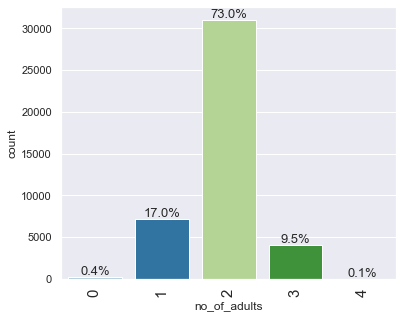

<IPython.core.display.Javascript object>

In [1159]:
labeled_barplot(df2, "no_of_adults", perc=True)
# plt.savefig("NoAdultsBar.jpg", bbox_inches="tight")

#### Still same findings
* Most of the bookings are of 2 adults
* There is a percentage of bookings with 0 adults...shouldn't be possible but it's higher than 4 adults | outlier?

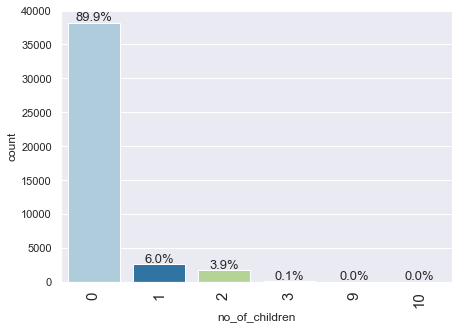

<IPython.core.display.Javascript object>

In [1297]:
labeled_barplot(df2, "no_of_children", perc=True)
plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* By a huge percentage, 90% (was 92%), most bookings are without children
* Seems like couples book at these hotels the most without kids
* 10 and 9 kids are both 0% | outliers?

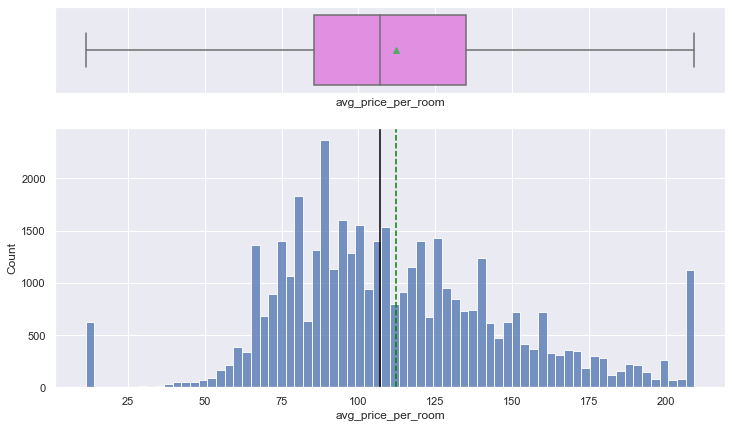

<IPython.core.display.Javascript object>

In [1300]:
histogram_boxplot(df2, "avg_price_per_room")
plt.savefig("avg_price.jpg", bbox_inches="tight")


#### Much easier to see and distribution smoothed a little
* Median and mean are neary the same, fairly normal distribution but some right skewness
* Several 0 values, are they the complementary rooms? or outliers?
* Most rooms are below 200 euros

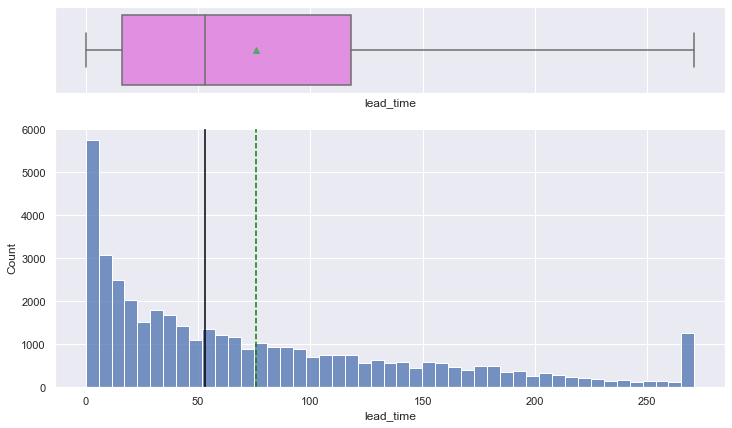

<IPython.core.display.Javascript object>

In [1296]:
histogram_boxplot(df2, "lead_time")
plt.savefig("Lead_time.jpg", bbox_inches="tight")

#### Way easier to visualize ; most bookings have a short time between booking and arrival
* Lead time is predominantly 0 
* Right skewed distribution
* Mean and median not close

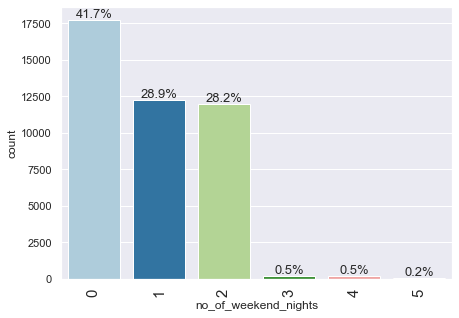

<IPython.core.display.Javascript object>

In [1163]:
labeled_barplot(df2, "no_of_weekend_nights", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Most bookings are split with 42% (was 45%) not have weekend nights
* And a combined with 1 and 2 weekend nights ~50%
* Above 2 has to be outliers...unless the bookings span several weeks long, doesn't seem we have that information. Duration of stay would help clarify this metric #### Corrected ####


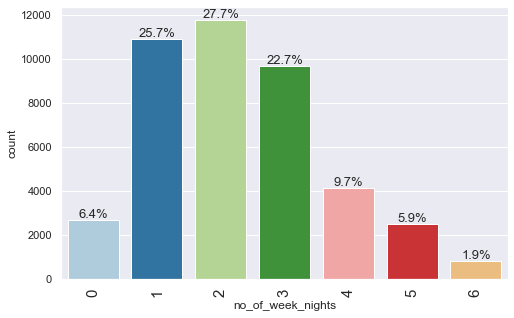

<IPython.core.display.Javascript object>

In [1164]:
labeled_barplot(df2, "no_of_week_nights", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

#### 1-3 highest number of weeknights booked
* Highest percentage is 2 weeknights
* Again the higher number of weeknights is questionable without knowing the total duration of stay
* Are there data points with both week and weekend nights as 0?

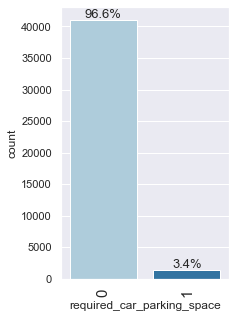

<IPython.core.display.Javascript object>

In [1302]:
labeled_barplot(df2, "required_car_parking_space", perc=True)
plt.savefig("parking_space.jpg", bbox_inches="tight")

* Seems to be a very small percentage require parking, 3.4% (was 2.6%)

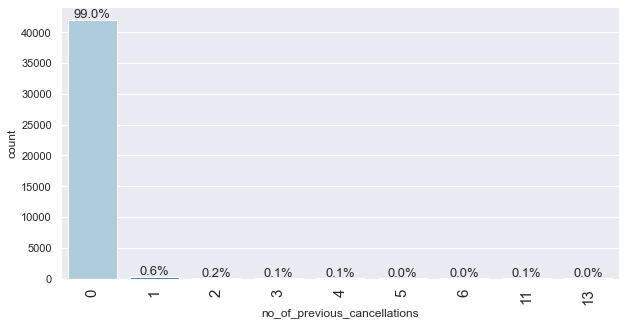

<IPython.core.display.Javascript object>

In [1168]:
labeled_barplot(df2, "no_of_previous_cancellations", perc=True)
#plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

#### Still same findings
* 99% have not had previous cancellations
* 6 and 13 are both at 0%

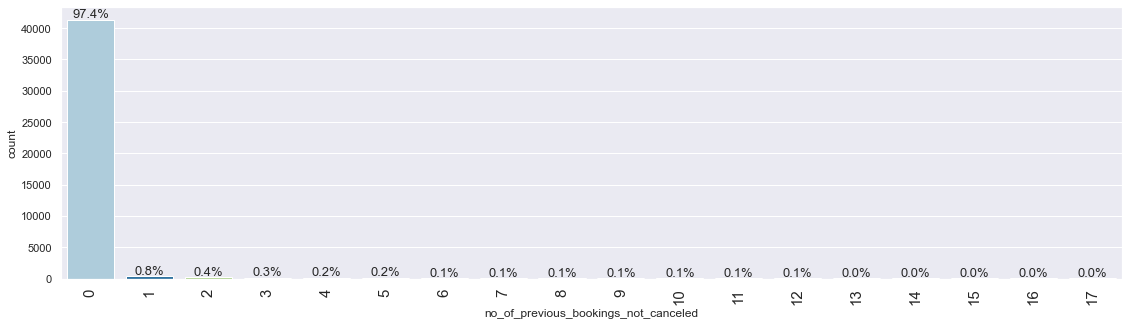

<IPython.core.display.Javascript object>

In [1169]:
labeled_barplot(df2, "no_of_previous_bookings_not_canceled", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

#### Much easier to see now
* 97% of previous bookings weren't cancelled

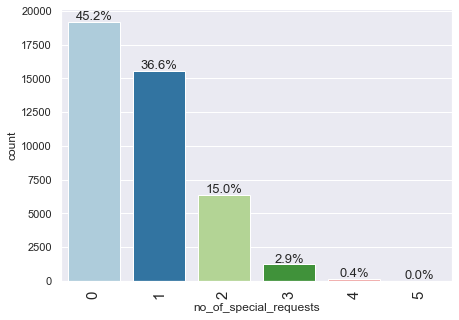

<IPython.core.display.Javascript object>

In [1301]:
labeled_barplot(df2, "no_of_special_requests", perc=True)
plt.savefig("SpecialRequest.jpg", bbox_inches="tight")

* 45% (was 52%) of bookings don't include special requests
* The other half have 1-2 special requests 
* A very small percentages have 3-4 special requests

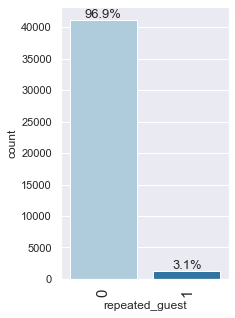

<IPython.core.display.Javascript object>

In [1171]:
labeled_barplot(df2, "repeated_guest", perc=True)
# plt.savefig("NoKidsBar.jpg", bbox_inches="tight")

* Most guests, 97.5 aren't repeat guests
* Only 3% (was 2.5%) of guests are repeat users of Star Hotels

In [1172]:
# Let's start with correlations
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove(
    "arrival_year"
)  # dropping year column as it is temporal variable
numeric_columns.remove(
    "arrival_month"
)  # dropping month column as it is temporal variable
numeric_columns.remove("arrival_date")  # dropping day column as it is temporal variable

<IPython.core.display.Javascript object>

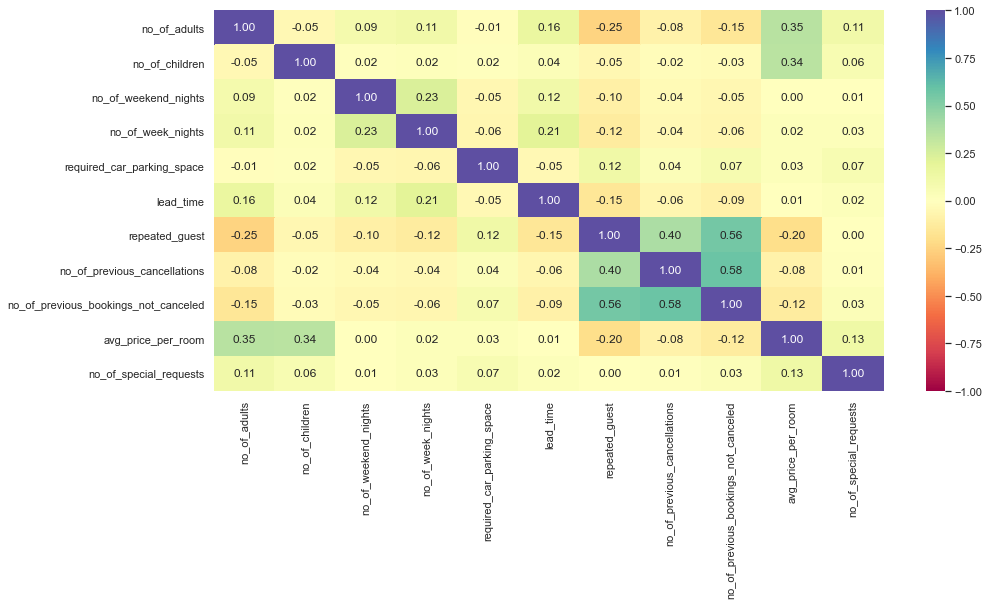

<IPython.core.display.Javascript object>

In [1173]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.savefig("heat_map.jpg", bbox_inches="tight")
plt.show()

#### Still same findings
* Highest corr is between # of previous cancellations and no of previous bookings not cancelled
* Next highest is repeat guest and no of previous bookings not cancelled, this makes sense
* Repeat guest and no of previous  cancellations also show some corr
* Otherwise not too much corr positive or neg...slight between no of adults/children versus price of room

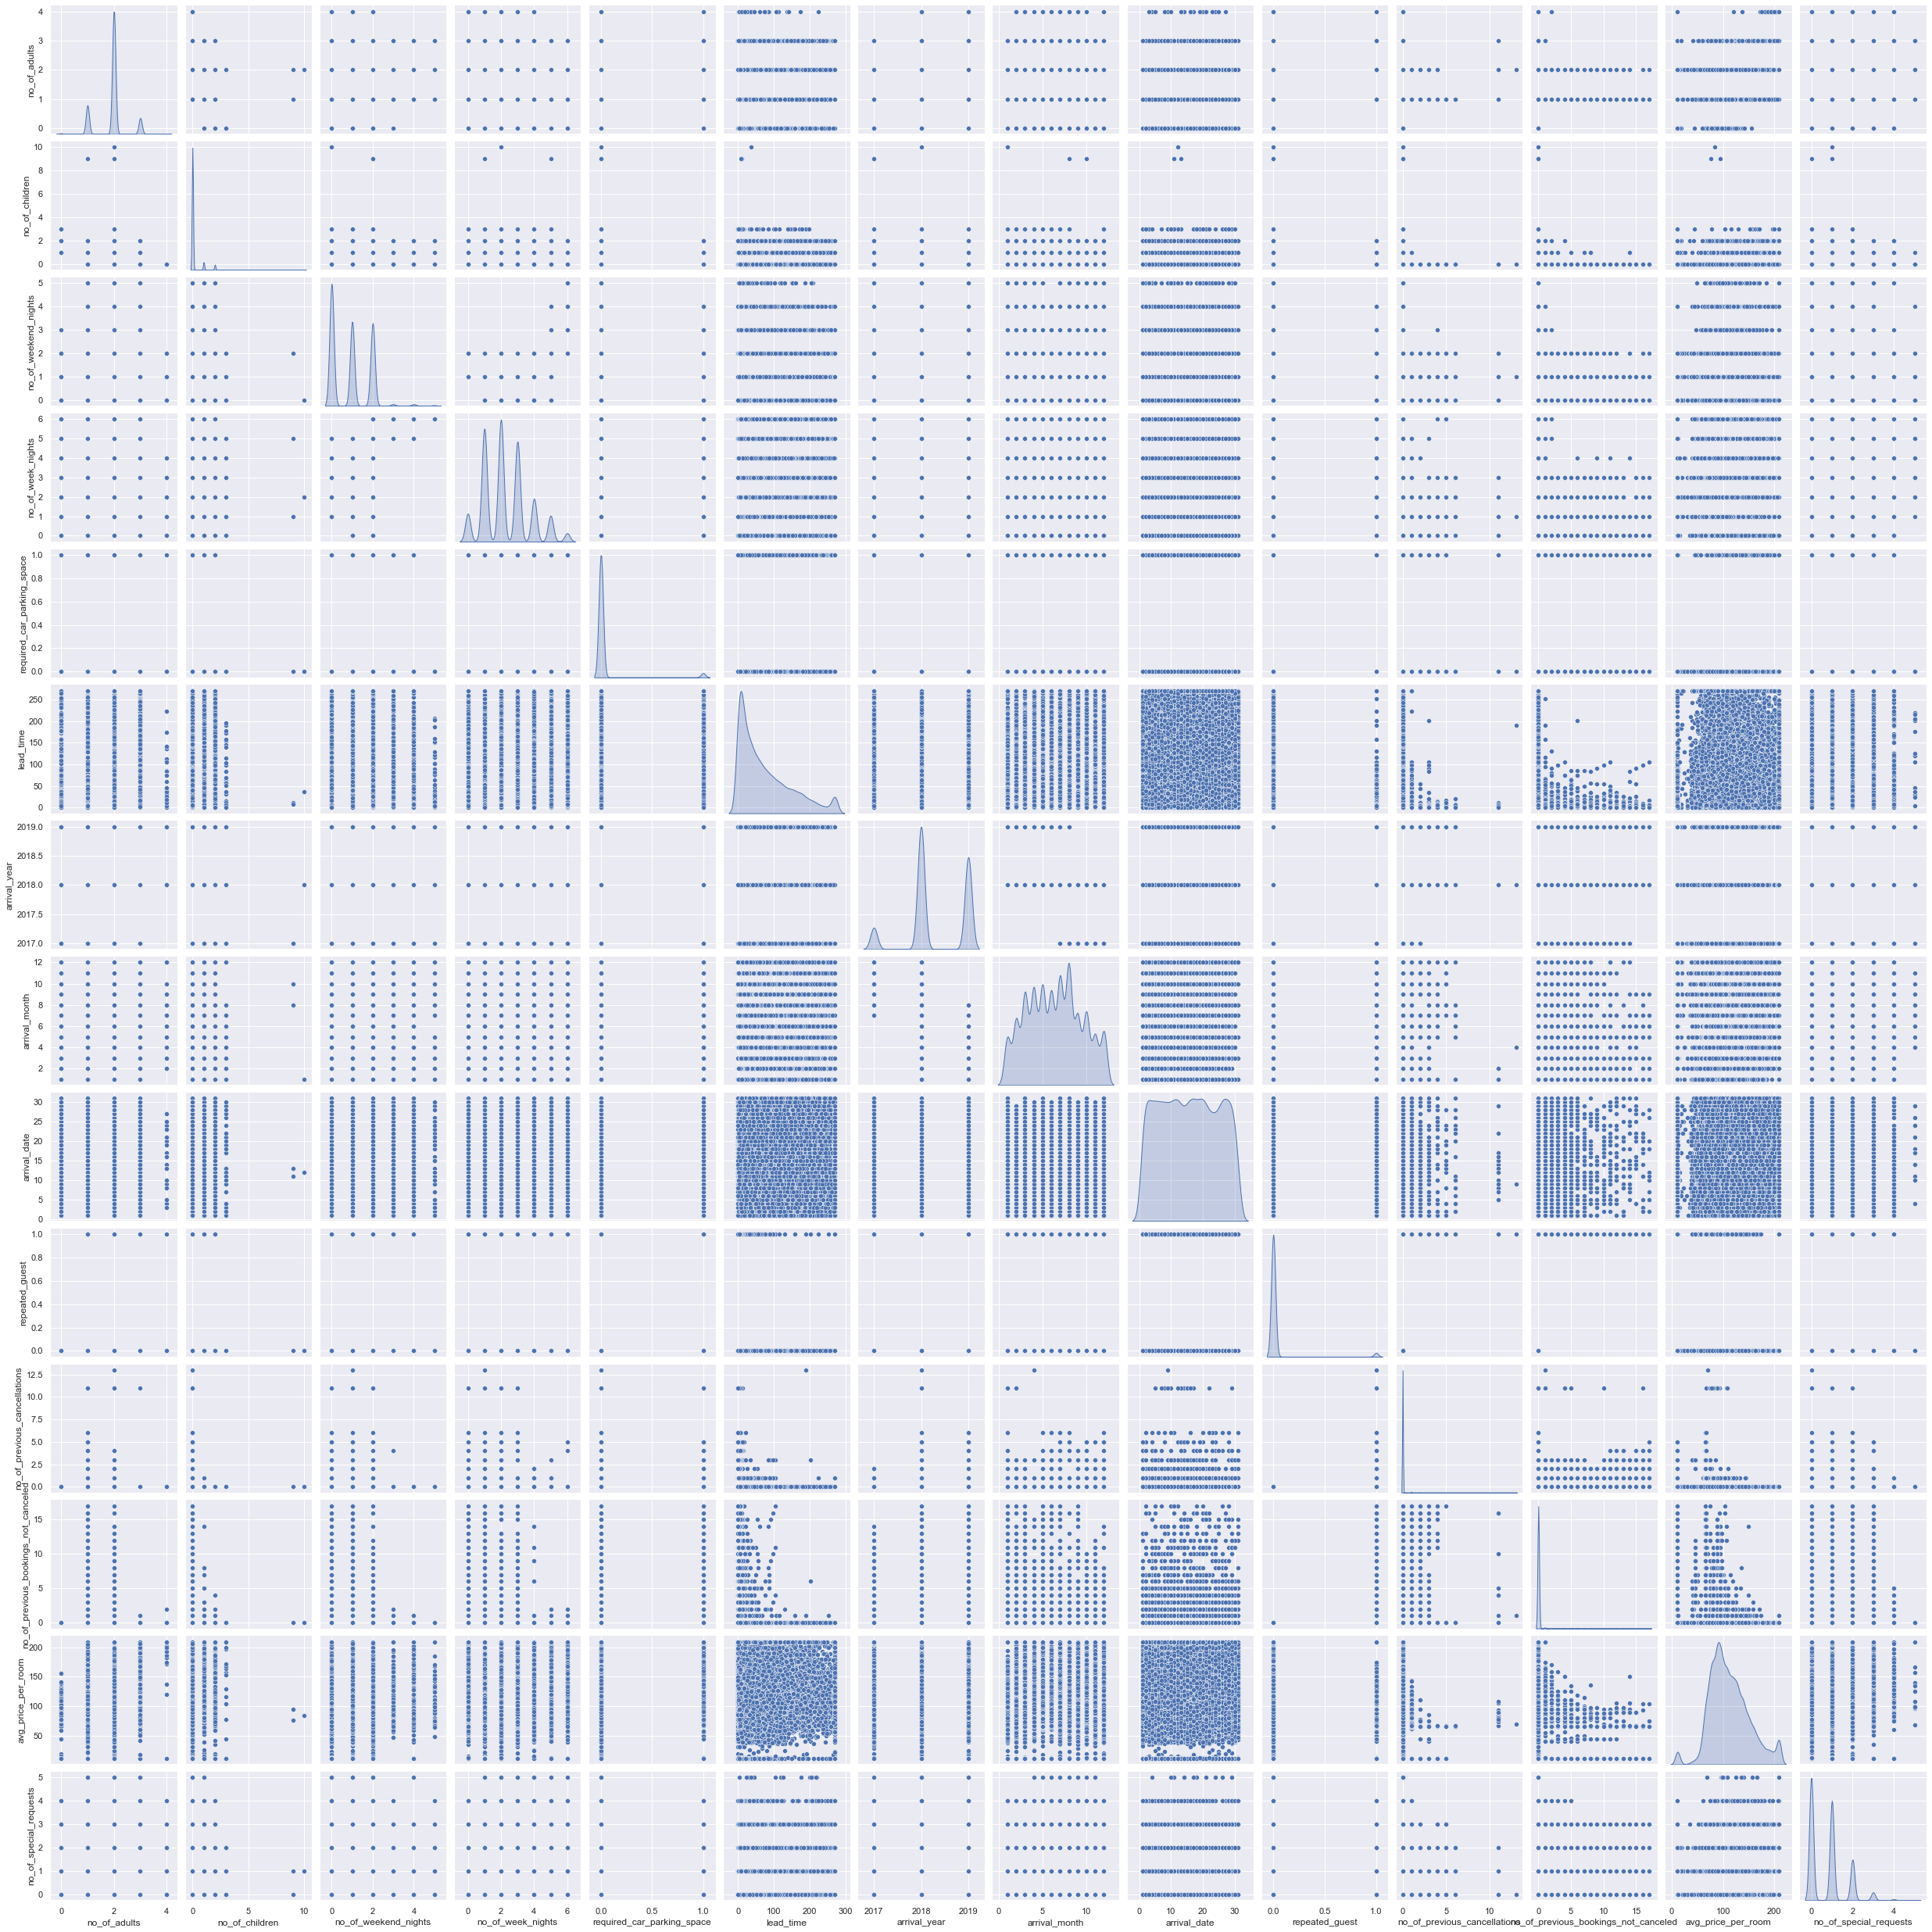

<IPython.core.display.Javascript object>

In [1174]:
# Pairplot to look at distributions and scatterplots
sns.set(rc={"figure.figsize": (16, 9)})
sns.pairplot(df2, diag_kind="kde")
plt.show()

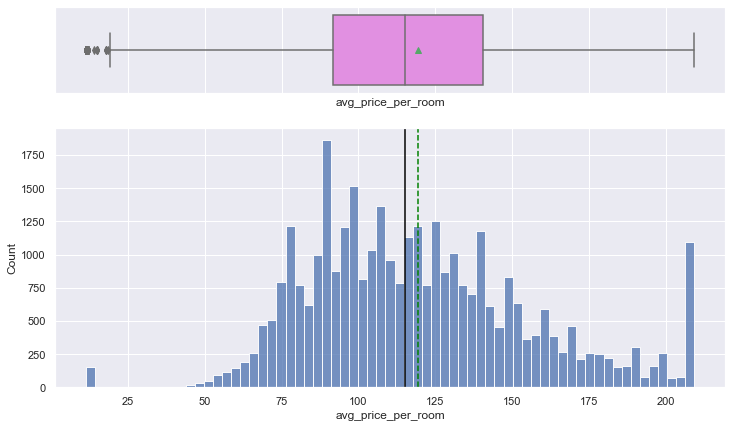

<IPython.core.display.Javascript object>

In [1303]:
# Plot of only Online Market avg prices
histogram_boxplot(df_Online, "avg_price_per_room")
plt.savefig("online_avg_price.jpg", bbox_inches="tight")

#### Still same findings
* Normal distribution with some right skewness
* Some decent variability within the prices of online market but most are less than 200

In [1179]:
# Create a subset of only the Aviation market type
df_Aviation = df2[df2.market_segment_type == "Aviation"]
df_Aviation.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
44               1               0                     0                  2   
2307             1               0                     0                  1   
3483             1               0                     1                  0   
3521             1               0                     1                  3   
3560             1               0                     5                  6   

     type_of_meal_plan  required_car_parking_space room_type_reserved  \
44         Meal Plan 1                           0        Room_Type 4   
2307       Meal Plan 1                           0        Room_Type 4   
3483       Meal Plan 1                           0        Room_Type 1   
3521       Meal Plan 1                           0        Room_Type 1   
3560       Meal Plan 1                           0        Room_Type 1   

      lead_time  arrival_year  arrival_month  arrival_date  \
44            2          2018              5            19   
2307         20          2018              5            26   
3483          0          2019              6            12   
3521          3          2019              4             3   
3560         11          2018              5             9   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
44              Aviation               0                             0   
2307            Aviation               0                             0   
3483            Aviation               1                             0   
3521            Aviation               0                             0   
3560            Aviation               0                             0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
44                                       0           110.00000   
2307                                     0           110.00000   
3483                                     1            95.00000   
3521                                     0           103.50000   
3560                                     0            95.00000   

      no_of_special_requests booking_status  
44                         0       Canceled  
2307                       0       Canceled  
3483                       0   Not_Canceled  
3521                       0       Canceled  
3560                       0       Canceled

<IPython.core.display.Javascript object>

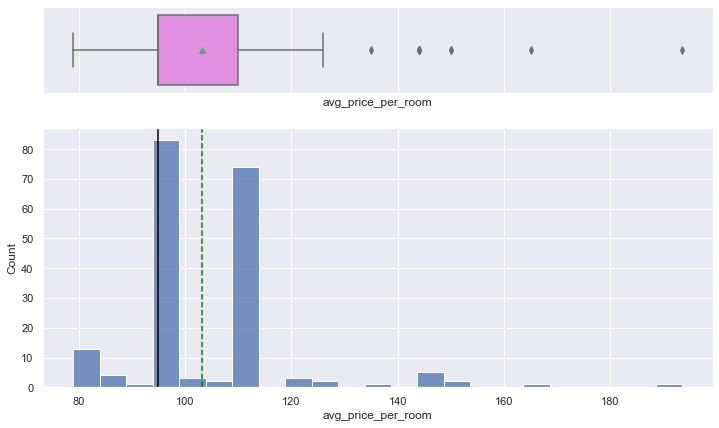

<IPython.core.display.Javascript object>

In [1304]:
# Plot of only Aviation Market avg prices
histogram_boxplot(df_Aviation, "avg_price_per_room")
plt.savefig("aviation_avg_price.jpg", bbox_inches="tight")

#### Still same findings
* Not a normal distribution in Aviation
* Almost all room prices fall into 2 price categories 
* Small variability

In [1181]:
# Create a subset of only the Offline market type
df_Offline = df2[df2.market_segment_type == "Offline"]
df_Offline.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              2               0                     1                  2   
9              2               0                     0                  4   
11             3               0                     0                  4   
23             1               0                     1                  0   
28             2               0                     1                  0   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
0        Meal Plan 1                           0        Room_Type 1   
9        Meal Plan 1                           0        Room_Type 1   
11       Meal Plan 1                           0        Room_Type 1   
23       Meal Plan 1                           0        Room_Type 1   
28       Meal Plan 1                           0        Room_Type 1   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
0         224          2017             10             2             Offline   
9         133          2019              4            19             Offline   
11        121          2018              7             6             Offline   
23          0          2017             10             5             Offline   
28         12          2017             10             4             Offline   

    repeated_guest  no_of_previous_cancellations  \
0                0                             0   
9                0                             0   
11               0                             0   
23               0                             0   
28               0                             0   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                      0            65.00000   
9                                      0           124.00000   
11                                     0            96.90000   
23                                     0            96.00000   
28                                     0            72.00000   

    no_of_special_requests booking_status  
0                        0   Not_Canceled  
9                        0   Not_Canceled  
11                       1   Not_Canceled  
23                       0   Not_Canceled  
28                       0   Not_Canceled

<IPython.core.display.Javascript object>

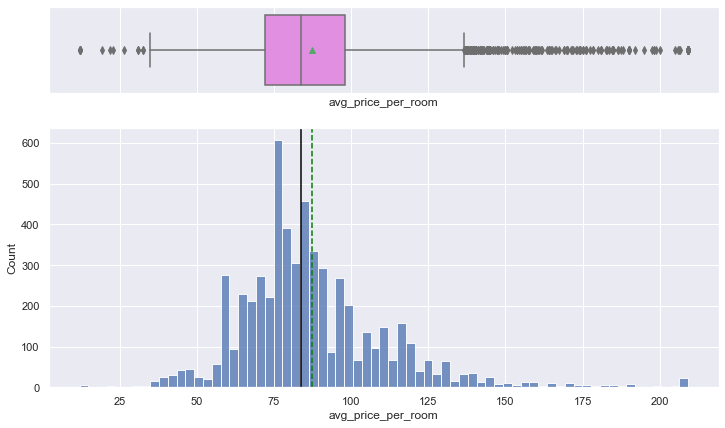

<IPython.core.display.Javascript object>

In [1182]:
# Plot of only Offline Market avg prices
histogram_boxplot(df_Offline, "avg_price_per_room")

* Similar look to Offline as Online with normal distribution and right skewness
* Most values lie  between 70 and 100 euros

In [1183]:
# Create a subset of only the Corporate market type
df_Corporate = df2[df2.market_segment_type == "Corporate"]
df_Corporate.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18              1               0                     0                  3   
30              1               0                     0                  1   
76              2               0                     2                  6   
84              2               0                     1                  0   
131             1               0                     2                  6   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
18        Meal Plan 1                           0        Room_Type 1   
30        Meal Plan 1                           0        Room_Type 1   
76        Meal Plan 1                           0        Room_Type 1   
84        Meal Plan 1                           0        Room_Type 4   
131       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
18          69          2019              4             6           Corporate   
30         122          2018             11            25           Corporate   
76         182          2019              3            11           Corporate   
84          20          2019              5            14           Corporate   
131        182          2019              3            11           Corporate   

     repeated_guest  no_of_previous_cancellations  \
18                0                             0   
30                0                             0   
76                0                             0   
84                0                             0   
131               0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
18                                      0            85.00000   
30                                      0            67.00000   
76                                      0            90.00000   
84                                      0           110.00000   
131                                     0            80.00000   

     no_of_special_requests booking_status  
18                        0       Canceled  
30                        0   Not_Canceled  
76                        1   Not_Canceled  
84                        0       Canceled  
131                       0   Not_Canceled

<IPython.core.display.Javascript object>

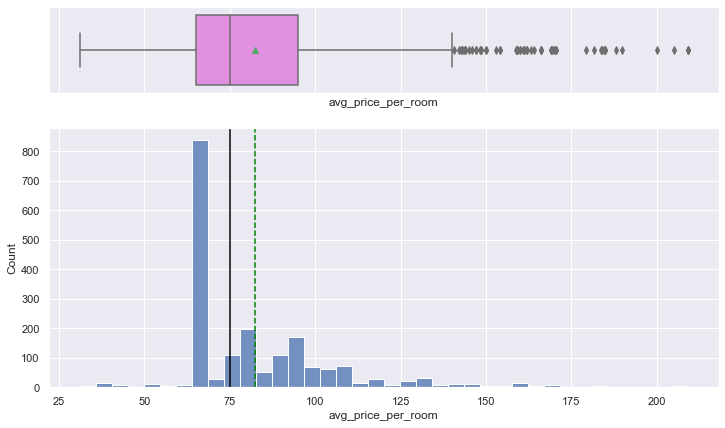

<IPython.core.display.Javascript object>

In [1184]:
# Plot of only Corporate Market avg prices
histogram_boxplot(df_Corporate, "avg_price_per_room")

#### Still same findings
* Similar to Aviation (makes sense both would be purchased via company travel)
* Most values fall into 1 price but some right skewness

In [1185]:
# Create a subset of only the Complementary market type
df_Complementary = df2[df2.market_segment_type == "Complementary"]
df_Complementary.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
98              1               0                     0                  1   
129             1               0                     2                  0   
226             1               0                     0                  2   
407             1               0                     0                  2   
410             1               0                     2                  1   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
98        Meal Plan 1                           0        Room_Type 1   
129       Meal Plan 1                           0        Room_Type 1   
226       Meal Plan 1                           0        Room_Type 1   
407       Meal Plan 1                           0        Room_Type 1   
410       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
98           2          2017              9            10       Complementary   
129         17          2019              5            28       Complementary   
226         13          2018              6             1       Complementary   
407          1          2017              8            12       Complementary   
410          4          2017              8            23       Complementary   

     repeated_guest  no_of_previous_cancellations  \
98                0                             0   
129               1                             0   
226               1                             3   
407               1                             0   
410               0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
98                                      0            11.25000   
129                                     3            11.25000   
226                                     5            11.25000   
407                                     1            11.25000   
410                                     0            11.25000   

     no_of_special_requests booking_status  
98                        1   Not_Canceled  
129                       1   Not_Canceled  
226                       1   Not_Canceled  
407                       1   Not_Canceled  
410                       1   Not_Canceled

<IPython.core.display.Javascript object>

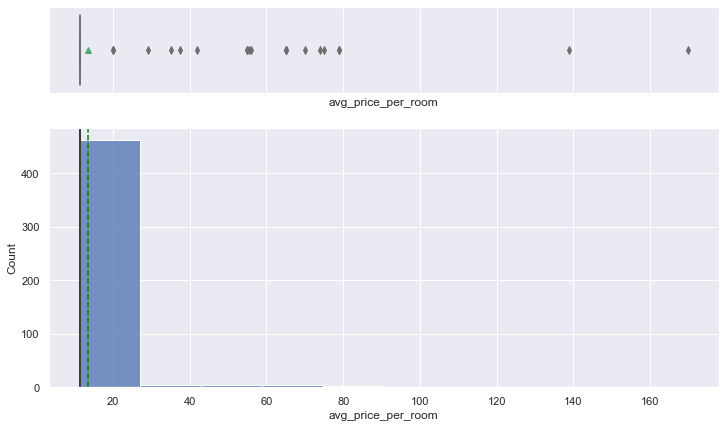

<IPython.core.display.Javascript object>

In [1186]:
# Plot of only Complementary Market avg prices
histogram_boxplot(df_Complementary, "avg_price_per_room")

* Complementary as expected, most values at 0

#### Still same findings
* In answer to the question on differences within markets, Online market has the highest averages with the other market averages within 40 (except complementary)
* Online and offline market both have similar distributions and differences within market
* Aviation and Corporate have bucket type averages
* Complementary is mostly 0

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
Not_Canceled            10430  11187  4980  1229  150  16  27992
All                     19180  15533  6369  1229  150  16  42477
Canceled                 8750   4346  1389     0    0   0  14485
------------------------------------------------------------------------------------------------------------------------


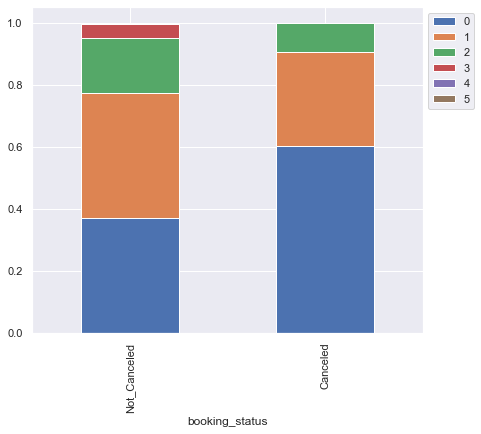

<Figure size 1152x648 with 0 Axes>

<IPython.core.display.Javascript object>

In [1305]:
# Display stacked barplot to visual booking status vs special requests with counts
stacked_barplot(df2, "booking_status", "no_of_special_requests")
plt.savefig("special_requests_table.jpg", bbox_inches="tight")

* The guests with 0 special requests are the highest count for cancelled 
* Guests with 1 special request have the highest count for not cancelled though 0 requests is very close in count
* Of note, guests with 3, 4, or 5 requests have 0 cancellations; More special requests less likely to cancel

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [1188]:
# Create a subset of only the repeat guest
df_repeat = df2[df2.repeated_guest == 1]
df_repeat.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
26              1               0                     0                  2   
129             1               0                     2                  0   
136             2               0                     0                  1   
179             1               0                     0                  1   
197             1               0                     0                  2   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
26        Meal Plan 1                           0        Room_Type 4   
129       Meal Plan 1                           0        Room_Type 1   
136      Not Selected                           0        Room_Type 1   
179       Meal Plan 1                           1        Room_Type 1   
197       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
26          54          2019              3            22              Online   
129         17          2019              5            28       Complementary   
136         17          2018             12            10              Online   
179         14          2019              8            31           Corporate   
197          5          2019              1            10           Corporate   

     repeated_guest  no_of_previous_cancellations  \
26                1                             0   
129               1                             0   
136               1                             0   
179               1                             0   
197               1                             3   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
26                                      3            78.31000   
129                                     3            11.25000   
136                                     5            95.00000   
179                                     3            67.00000   
197                                     0            65.00000   

     no_of_special_requests booking_status  
26                        1   Not_Canceled  
129                       1   Not_Canceled  
136                       0   Not_Canceled  
179                       2   Not_Canceled  
197                       0   Not_Canceled

<IPython.core.display.Javascript object>

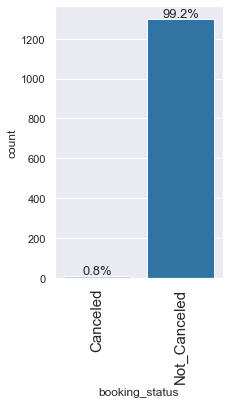

<IPython.core.display.Javascript object>

In [1306]:
labeled_barplot(df_repeat, "booking_status", perc=True)
plt.savefig("RepeatGuests.jpg", bbox_inches="tight")

#### Still same findings
* Only 0.8% of repeat guests cancelled...very low percentage

8. What is the predominant month for repeat guests?

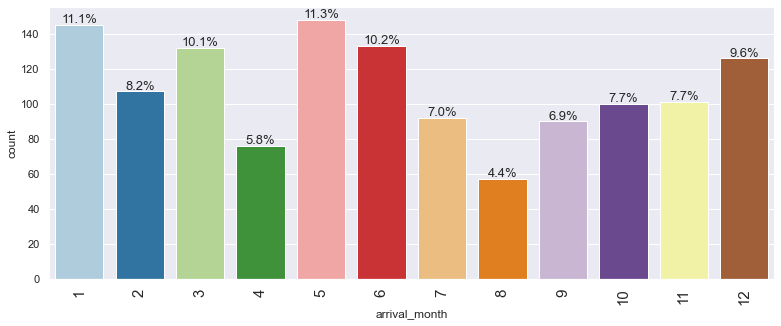

<IPython.core.display.Javascript object>

In [1307]:
labeled_barplot(df_repeat, "arrival_month", perc=True)
plt.savefig("Months_repeatGuests.jpg", bbox_inches="tight")

* Interestingly, repeat guests are more uniform on the months of arrival
* Plus the off season for most guest (winter months) has a high percentage of repeat guests

11. Is there a higher avg cost based on month of the year of arrival? 

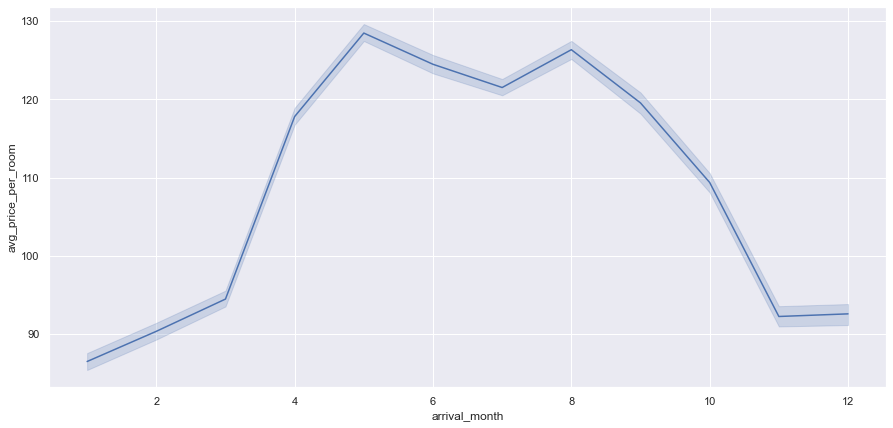

<IPython.core.display.Javascript object>

In [1308]:
# Want to see by year the used price separated out by 4g
plt.figure(figsize=(15, 7))
sns.lineplot(x=df2["arrival_month"], y=df2["avg_price_per_room"])
plt.savefig("pricePerMonth.jpg", bbox_inches="tight")
# plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* It does show that the price goes up when the highest arrival months are, summer and spring
* Repeat guests would be happy with the lower prices on off months 

9. Do people who book with kids cancel more than guest without since kids add complexity to travel plans?

In [1194]:
# Create a subset of only the guests with children
df_kid = df2[df2.no_of_children > 0]
df_kid.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
42             2               1                     0                  3   
45             2               2                     0                  3   
50             2               1                     2                  4   
54             0               2                     0                  3   
94             2               2                     0                  1   

   type_of_meal_plan  required_car_parking_space room_type_reserved  \
42       Meal Plan 1                           0        Room_Type 1   
45       Meal Plan 1                           0        Room_Type 6   
50       Meal Plan 1                           0        Room_Type 1   
54       Meal Plan 1                           0        Room_Type 2   
94       Meal Plan 1                           1        Room_Type 6   

    lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
42        139          2019              4            12              Online   
45        195          2019              8            16              Online   
50        173          2019              8            17              Online   
54         56          2018             12             7              Online   
94          2          2018              9             2              Online   

    repeated_guest  no_of_previous_cancellations  \
42               0                             0   
45               0                             0   
50               0                             0   
54               0                             0   
94               0                             0   

    no_of_previous_bookings_not_canceled  avg_price_per_room  \
42                                     0           141.00000   
45                                     0           209.25000   
50                                     0           137.85000   
54                                     0            82.44000   
94                                     0           209.25000   

    no_of_special_requests booking_status  
42                       2   Not_Canceled  
45                       0       Canceled  
50                       0       Canceled  
54                       1   Not_Canceled  
94                       1   Not_Canceled

<IPython.core.display.Javascript object>

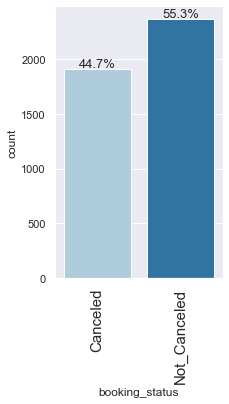

<IPython.core.display.Javascript object>

In [1309]:
labeled_barplot(df_kid, "booking_status", perc=True)
plt.savefig("NoKids_cancellations.jpg", bbox_inches="tight")

* There is a higher percentage of cancelled with guests with children at 44.6% compared to other features comparison
* Though the percentage of guests with kids that didn't cancel is slightly higher, 55.4%

12. Is there a higher avg cost associated with room type?

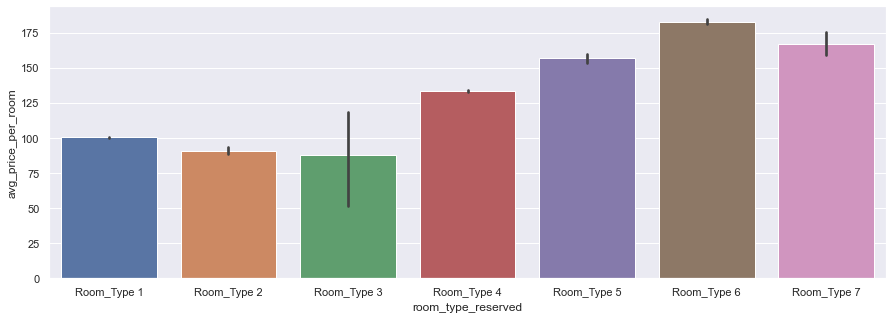

<IPython.core.display.Javascript object>

In [1310]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df2, x="room_type_reserved", y="avg_price_per_room")
plt.savefig("room_type_price.jpg", bbox_inches="tight")
plt.show()

* There are some differences in room type and avg room price
* The most popular choice avg's ~100
* Room type 3 has the most variability within
* Room type 4 has a higher cost and is second highest with repeat customers; perhaps a better room

### Would like to look at some multivariate charts in respect to booking status

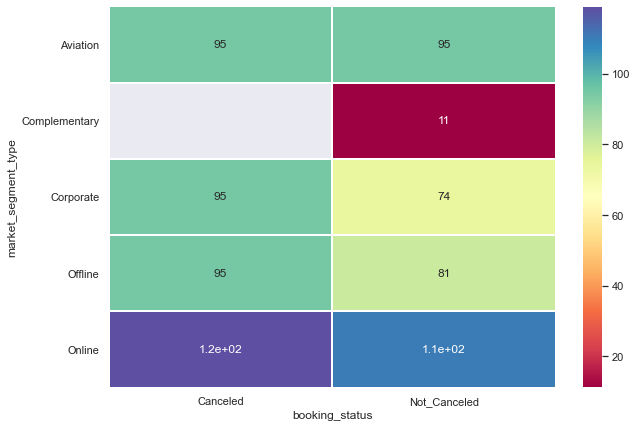

<IPython.core.display.Javascript object>

In [1197]:
# Market type vs booking status vs avg room price heat map
df_hm = df2.pivot_table(
    index="market_segment_type",
    columns="booking_status",
    values="avg_price_per_room",
    aggfunc=np.median,
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
    df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax,
)
plt.show()

* Higher average price on online for cancelled rooms 
* Higher average room price on each market segment for cancelled except aviation (and complementary which has no cancels)

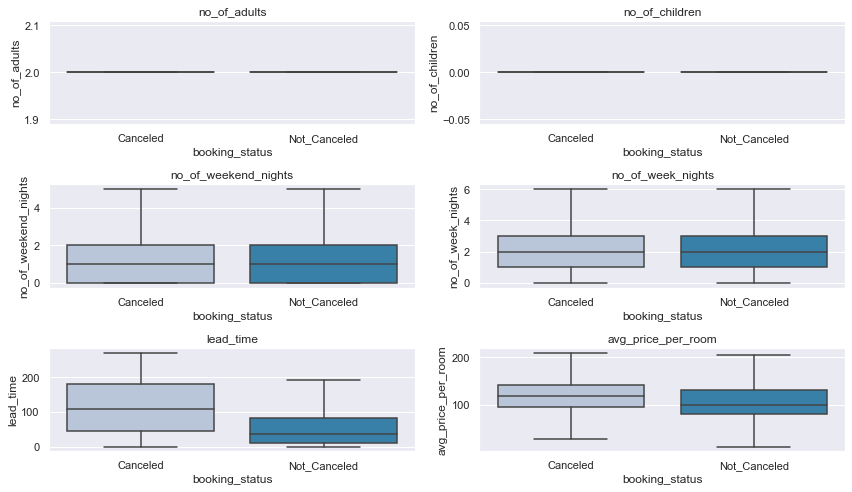

<IPython.core.display.Javascript object>

In [1198]:
cols = df2[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "lead_time",
        "avg_price_per_room",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df2["booking_status"], df2[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There is a difference in lead time, less lead time more cancelled
* The rest of the features are pretty similar

## Data Prep for Model

* First break out the dependent variable (set up X and y)
* Then do the one hot encoding on categorical variables
* Split the data into train and test

In [1199]:
# Set up X with all the data minus the value to predict and make that y
X = df2.drop(["booking_status"], axis=1)
y = df2["booking_status"]

print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        271   

   arrival_year  arrival_month  arrival_date market_segm

<IPython.core.display.Javascript object>

In [1200]:
# Now to one hot encode the categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
# adding constant
X = sm.add_constant(X)

X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000             2               0                     1   
1 1.00000             2               0                     2   
2 1.00000             1               0                     2   
3 1.00000             2               0                     0   
4 1.00000             3               0                     0   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  3                           0        271          2019   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              7            13               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            89.10000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       2                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                          

<IPython.core.display.Javascript object>

In [1201]:
# Now to one hot encode the categorical variables; don't want to drop first because it's the variable we are trying to predict
y = pd.get_dummies(
    y,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=False,
)
y.head()

Canceled  Not_Canceled
0         0             1
1         0             1
2         1             0
3         1             0
4         1             0

<IPython.core.display.Javascript object>

In [1202]:
# Now to drop the Not_Canceled from y as we are concerned with predicting the canceled rooms
y = y["Canceled"]
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Canceled, dtype: uint8

<IPython.core.display.Javascript object>

In [1203]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [1204]:
# Check the split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 29733
Number of rows in test data = 12744


<IPython.core.display.Javascript object>

* Now we have pre-processed data, broken into dependent and independent variable, plus split into 70/30 training and test data
* Ready to go!

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [1205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [1206]:
# Check the vif for the x train data that will be used for logistic regression
checking_vif(x_train)

feature            VIF
0                                  const 18582012.42840
1                           no_of_adults        1.46258
2                         no_of_children        2.14471
3                   no_of_weekend_nights        1.05962
4                      no_of_week_nights        1.12994
5             required_car_parking_space        1.03820
6                              lead_time        1.35045
7                           arrival_year        1.78524
8                          arrival_month        1.55387
9                           arrival_date        1.00421
10                        repeated_guest        2.65077
11          no_of_previous_cancellations        1.19595
12  no_of_previous_bookings_not_canceled        1.90295
13                    avg_price_per_room        2.60288
14                no_of_special_requests        1.11167
15         type_of_meal_plan_Meal Plan 2        1.09642
16         type_of_meal_plan_Meal Plan 3        1.02455
17        type_of_meal_plan_Not Selected        1.33597
18        room_type_reserved_Room_Type 2        1.10312
19        room_type_reserved_Room_Type 3        1.00133
20        room_type_reserved_Room_Type 4        1.44449
21        room_type_reserved_Room_Type 5        1.12137
22        room_type_reserved_Room_Type 6        2.12587
23        room_type_reserved_Room_Type 7        1.14525
24     market_segment_type_Complementary        3.73134
25         market_segment_type_Corporate       11.46934
26           market_segment_type_Offline       29.91741
27            market_segment_type_Online       39.22894

<IPython.core.display.Javascript object>

* Looking good...a couple of features have some high VIF, will need to treat

In [1207]:
# Defined function to visual best treatment for VIF features
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [1208]:
# Use the function above, we will start with meal plan
col_list = [
    "market_segment_type_Corporate",
    "market_segment_type_Offline",
    "market_segment_type_Online",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0  market_segment_type_Corporate                            0.34565   
1     market_segment_type_Online                            0.34557   
2    market_segment_type_Offline                            0.34485   

   RMSE after dropping col  
0                  0.38276  
1                  0.38279  
2                  0.38300

<IPython.core.display.Javascript object>

In [1209]:
col_to_drop = "market_segment_type_Corporate"
x_train1 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test1 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Corporate


feature            VIF
0                                  const 18560014.99114
1                           no_of_adults        1.45873
2                         no_of_children        2.14459
3                   no_of_weekend_nights        1.05860
4                      no_of_week_nights        1.12925
5             required_car_parking_space        1.03752
6                              lead_time        1.34987
7                           arrival_year        1.78352
8                          arrival_month        1.55386
9                           arrival_date        1.00421
10                        repeated_guest        2.64789
11          no_of_previous_cancellations        1.19580
12  no_of_previous_bookings_not_canceled        1.89626
13                    avg_price_per_room        2.60129
14                no_of_special_requests        1.11163
15         type_of_meal_plan_Meal Plan 2        1.09639
16         type_of_meal_plan_Meal Plan 3        1.02455
17        type_of_meal_plan_Not Selected        1.33563
18        room_type_reserved_Room_Type 2        1.10308
19        room_type_reserved_Room_Type 3        1.00133
20        room_type_reserved_Room_Type 4        1.44006
21        room_type_reserved_Room_Type 5        1.12109
22        room_type_reserved_Room_Type 6        2.12584
23        room_type_reserved_Room_Type 7        1.14524
24     market_segment_type_Complementary        1.38807
25           market_segment_type_Offline        4.77763
26            market_segment_type_Online        5.84107

<IPython.core.display.Javascript object>

* Now there is no multicollinearity, ready to move on with x_train1 and x_test1

## Building a Logistic Regression model

In [1210]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train1, y_train)
# predict on test
y_predict = model.predict(x_test1)


coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

         0        1       2       3       4        5       6        7  \
0 -0.00000 -0.10104 0.00320 0.04126 0.07361 -0.82164 0.01703 -0.00176   

         8        9       10       11       12      13       14       15  \
0 -0.03764 -0.00379 -0.19708 -0.04527 -0.33361 0.01663 -1.31151 -0.12016   

       16      17       18      19       20       21       22       23  \
0 0.00484 0.26620 -0.00382 0.00167 -0.08262 -0.13958 -0.11310 -0.09313   

        24       25      26  intercept  
0 -0.04167 -1.09186 1.02043   -0.00000  


<IPython.core.display.Javascript object>

* Negative values of coefficient show probability of guest cancelling decrease with increase of the corresponding attribute value
    * required_car_parking_space 
    * no_of_special_requests
    * market_segment_type_Offline

* Positive values of coefficient show probability of guest cancelling increase with increase of the corresponding attribute value
    * market_segment_type_Online

In [1211]:
logit = sm.Logit(y_train, x_train1.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:               Canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29706
Method:                           MLE   Df Model:                           26
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                     inf
Time:                        19:54:59   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   50.3364     68.444      0.735      0.462     -83.811     184.484
no_of_adults                            -0.0604      

<IPython.core.display.Javascript object>

* Surprisingly different values for some of the coefficients between the two logistic regression models
* But these values here seem to match some of what was seen visually in the EDA

* Negative values of coefficient show probability of guest cancelling decrease with increase of the corresponding attribute value
    * required_car_parking_space
    * repeated_guest
    * no_of_special_requests
    * market_segment_type_Complementary
    * market_segment_type_Offline

* Positive values of coefficient show probability of guest cancelling increase with increase of the corresponding attribute value
    * type_of_meal_plan_Meal Plan 3
    * room_type_reserved_Room_Type 3
    
p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.  Will need to drop insignificant variables indicated by p-value but not all at once in case it alters the model post.


In [1212]:
# Loop to go through this process of dropping and checking

# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

* The above columns are the significant columns but const was removed so will have to add back

In [1213]:
# creating a new training set
x_train2 = x_train1[
    [
        "const",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
        "lead_time",
        "arrival_year",
        "arrival_month",
        "arrival_date",
        "repeated_guest",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
        "type_of_meal_plan_Not Selected",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
        "market_segment_type_Offline",
        "market_segment_type_Online",
    ]
].astype(float)

<IPython.core.display.Javascript object>

In [1214]:
# Rerun the statsmodel without the insignificant values
logit2 = sm.Logit(y_train, x_train2)
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:               Canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29714
Method:                           MLE   Df Model:                           18
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                     inf
Time:                        19:55:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             39.2146     67.686      0.579      0.562     -93.448     171.877
no_of_weekend_nights               0.0567      0.018      3.183      0.

<IPython.core.display.Javascript object>

* Looks like one p value is still > 0.05 (excluding const), arrival_year; will remove and re-run

In [1215]:
# creating a new training set
x_train3 = x_train2[
    [
        "const",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
        "lead_time",
        "arrival_month",
        "arrival_date",
        "repeated_guest",
        "no_of_previous_cancellations",
        "avg_price_per_room",
        "no_of_special_requests",
        "type_of_meal_plan_Not Selected",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
        "market_segment_type_Offline",
        "market_segment_type_Online",
    ]
].astype(float)

<IPython.core.display.Javascript object>

In [1216]:
# Rerun the statsmodel without the insignificant values
logit3 = sm.Logit(y_train, x_train3)
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:               Canceled   No. Observations:                29733
Model:                          Logit   Df Residuals:                    29715
Method:                           MLE   Df Model:                           17
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                     inf
Time:                        19:55:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.3579      0.122    -27.555      0.000      -3.597      -3.119
no_of_weekend_nights               0.0566      0.018      3.177      0.

<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of (in order of highest to lowest values):
    * market_segment_type_Online is positive; 
    * type_of_meal_plan_Not Selected
    * no_of_previous_cancellations
    * no_of_week_nights
    * no_of_weekend_nights
    * avg_price_per_room
    
are positive; an increase in these will lead to an increase in chances of a customer cancelling.
* Coefficients of (in order of highest to lowest values):
    * repeated_guest
    * market_segment_type_Offline 
    * required_car_parking_space
    * no_of_special_requests 
    * room_type_reserved_Room_Type 7
    * room_type_reserved_Room_Type 5
    * room_type_reserved_Room_Type 6
    * room_type_reserved_Room_Type 4
    * arrival_month
    * arrival_date

is negative; an increase in these will lead to a decrease in chances of a customer cancelling.

### Assumptions of Logistic Regression have been checked (variable are independent (VIF), p-values, interpretation of variables)
Ready to move to model performance evaluation 

## Model performance evaluation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will cancel and not contribute to the revenue but in reality the customer did not cancel and kept booking. - Increase of resources | as long as room doesn't get booked to someone else

2. Predicting a customer will not cancel but customer does cancel does not contribute to revenue when expected too. - Loss of opportunity and revenue as room won't be utilized but it was booked

### Which case is more important? 

* Predicting a customer cancelling that genuinely does cancel.  Goal is to reduce false negatives (or Type 2) as they are more detrimental to Star Hotels.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [1217]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [1218]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Checking model performance on the training set

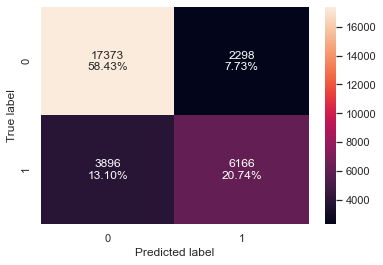

<IPython.core.display.Javascript object>

In [1219]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train3, y_train)

### Confusion matrix results
* True Positives (TP): predicted 20.7% would cancel bookings and they did cancel
* True Negatives (TN): predicted 58.4% wouldn't cancel and they didn't cancel
* False Postivies (FP): predicted 7.7% would cancel and they didn't cancel
#### Key metric:    
* False Negatives (FN): predicted 13.1% would not cancel but they did cancel

In [1220]:
# Check accuracy measures
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, x_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.79168 0.61280    0.72850 0.66566

<IPython.core.display.Javascript object>

* Accuracy isn't bad at 80% 
* Precision is a bit lower at 73%
* F1 is lower
* And the performance metric that covers what is important to this case, Recall is only 61%...room for improvement

#### ROC-AUC on training set

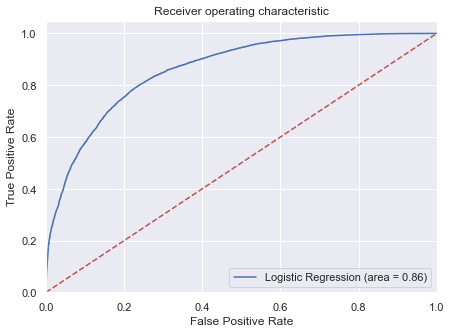

<IPython.core.display.Javascript object>

In [1221]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC is pretty good at 0.86 (close to 1) 
* Let's see if the recall score can be improved further by changing threshold

#### Find the optimal threshold via the AUC-ROC curve then apply it

In [1222]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.317598783658542


<IPython.core.display.Javascript object>

#### Let's see if the optimal threshold improves the model performance on training set

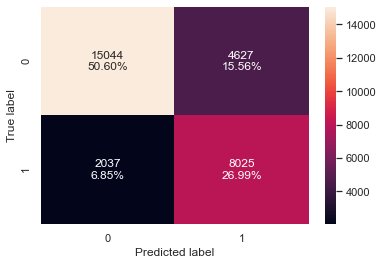

<IPython.core.display.Javascript object>

In [1223]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, x_train3, y_train, threshold=optimal_threshold_auc_roc
)

### BIG improvement by implementing the threshold!

### Confusion matrix results
* True Positives (TP): predicted 27% (was 20.7%) would cancel bookings and they did cancel
* True Negatives (TN): predicted 50.6% (was 58.4%) wouldn't cancel and they didn't cancel - decreased slightly
* False Postivies (FP): predicted 15.6% (was 7.7%) would cancel and they didn't cancel
#### Key metric:    
* False Negatives (FN): predicted 6.7% (13.1%) would not cancel but they did cancel - Improved by half!!!  This is good

In [1224]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77587 0.79756    0.63429 0.70661

<IPython.core.display.Javascript object>

* Accuracy lowered to 77.5% from 80%; still good but not the performance metric important to his case
* Precision is a bit lowered to 63% from 73%; again not a problems
* F1 went up to 70%
* And the performance metric that covers what is important to this case, Recall went up to 80% from 61%!

#### Now let's try Precision-Recall curve to try for a better threshold

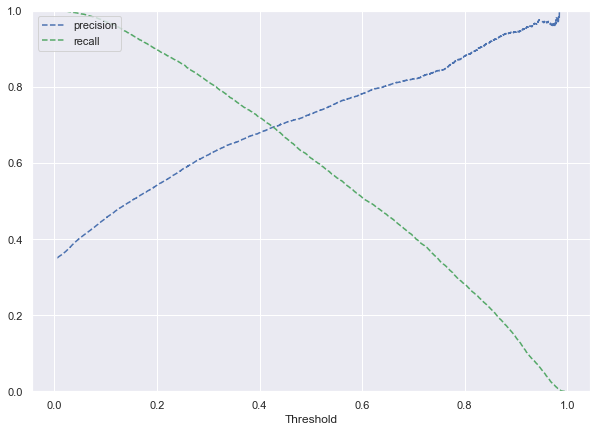

<IPython.core.display.Javascript object>

In [1225]:
y_scores = lg3.predict(x_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold of 0.42 we get equal precision and recall
* Since recall is our focus we can step back to 0.4 for a higher recall and still a good precision

In [1226]:
# setting the threshold
optimal_threshold_curve = 0.4

<IPython.core.display.Javascript object>

#### Check the model performance with the precision-recall threshold

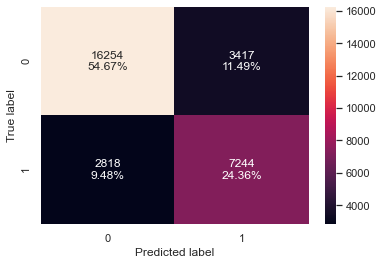

<IPython.core.display.Javascript object>

In [1227]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train3, y_train, threshold=optimal_threshold_curve)

### BIG improvement by implementing the threshold!

### Confusion matrix results
* True Positives (TP): predicted 24% (original 20.7%) would cancel bookings and they did cancel
* True Negatives (TN): predicted 55% (original 58.4%) wouldn't cancel and they didn't cancel - decreased slightly
* False Postivies (FP): predicted 12% (original 7.7%) would cancel and they didn't cancel
#### Key metric:    
* False Negatives (FN): predicted 10% (original 13.1%) would not cancel but they did cancel - Improved  This is good

In [1228]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79030 0.71994    0.67949 0.69913

<IPython.core.display.Javascript object>

* Accuracy lowered minimally to 79% from 80%; still good but not the performance metric important to his case
* Precision is a bit lowered to 68% from 73%; again not a problems
* F1 went up to 70%
* And the performance metric that covers what is important to this case, Recall went up to 72% from 61%!

### Now let's run through the test model

In [1229]:
# First need to drop the columns from the test set that were dropped from training set
x_test3 = x_test[x_train3.columns].astype(float)

<IPython.core.display.Javascript object>

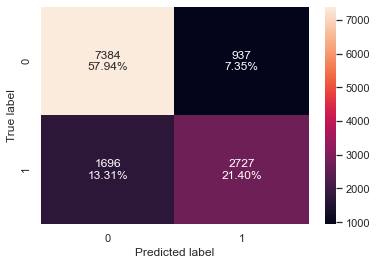

<IPython.core.display.Javascript object>

In [1230]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test3, y_test)

### Confusion matrix results
* True Positives (TP): predicted 21.4% would cancel bookings and they did cancel (training 20.7%)
* True Negatives (TN): predicted 57.9% wouldn't cancel and they didn't cancel (training 58.4%)
* False Postivies (FP): predicted 7.4% would cancel and they didn't cancel (training 7.7%)
#### Key metric:    
* False Negatives (FN): predicted 13.3% would not cancel but they did cancel (training 13.1%)

In [1231]:
# Check accuracy measures
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, x_test3, y_test
)

print("Training performance:")
log_reg_model_test_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.79339 0.61655    0.74427 0.67442

<IPython.core.display.Javascript object>

* Accuracy isn't bad at 79% 
* Precision is a bit lower at 74%
* F1 is lower at 67.4%
* And the performance metric that covers what is important to this case, Recall is only 62%...room for improvement

#### ROC-AUC on training set

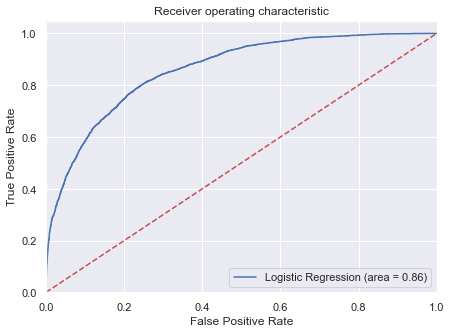

<IPython.core.display.Javascript object>

In [1232]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(x_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC is pretty good at 0.86 (close to 1) 
* Let's see if the recall score can be improved further by changing threshold

#### Find the optimal threshold via the AUC-ROC curve then apply it

In [1233]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3272623105713578


<IPython.core.display.Javascript object>

#### Let's see if the optimal threshold improves the model performance on training set

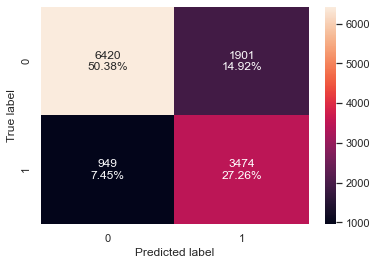

<IPython.core.display.Javascript object>

In [1234]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test3, y_test, threshold=optimal_threshold_auc_roc)

### BIG improvement by implementing the threshold!

### Confusion matrix results
* True Positives (TP): predicted 27.3% (was 21.4%) would cancel bookings and they did cancel (training 27%)
* True Negatives (TN): predicted 50.4% (was 57.9%) wouldn't cancel and they didn't cancel - decreased slightly (training 50.4%)
* False Postivies (FP): predicted 12.9% (was 7.4%) would cancel and they didn't cancel (training 14.9%)
#### Key metric:    
* False Negatives (FN): predicted 7.5% (13.3%) would not cancel but they did cancel - Improved by half!!!  This is good (training 7.5%)

In [1235]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_test_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77637 0.78544    0.64633 0.70912

<IPython.core.display.Javascript object>

* Accuracy lowered to 77.6% from 79%; still good but not the performance metric important to his case
* Precision is a bit lowered to 65% from 74%; again not a problems
* F1 went up to 71%
* And the performance metric that covers what is important to this case, Recall went up to 78% from 62%!

#### Now let's try Precision-Recall curve to try for a better threshold

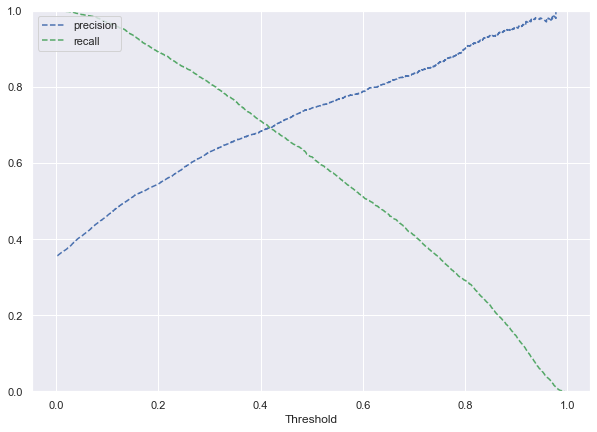

<IPython.core.display.Javascript object>

In [1236]:
y_scores = lg3.predict(x_test3)
prec, rec, tre = precision_recall_curve(y_test, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold of 0.41 we get equal precision and recall
* Since recall is our focus we can step back to 0.39 for a higher recall and still a good precision

In [1237]:
# setting the threshold
optimal_threshold_curve = 0.39

<IPython.core.display.Javascript object>

#### Check the model performance with the precision-recall threshold

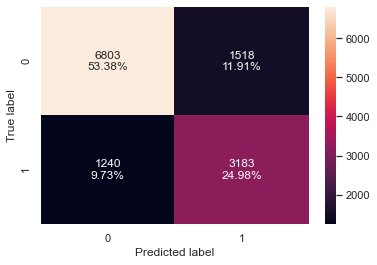

<IPython.core.display.Javascript object>

In [1238]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test3, y_test, threshold=optimal_threshold_curve)

### BIG improvement by implementing the threshold!

### Confusion matrix results
* True Positives (TP): predicted 25% (original 21.4%) would cancel bookings and they did cancel
* True Negatives (TN): predicted 53% (original 57.9%) wouldn't cancel and they didn't cancel - decreased slightly
* False Postivies (FP): predicted 12% (original 7.4%) would cancel and they didn't cancel
#### Key metric:    
* False Negatives (FN): predicted 9.7% (original 13.3%) would not cancel but they did cancel - Improved  This is good

In [1239]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_test3, y_test, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_test_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.78358 0.71965    0.67709 0.69772

<IPython.core.display.Javascript object>

* Accuracy lowered minimally to 78% from 79%; still good but not the performance metric important to his case
* Precision is a bit lowered to 68% from 74%; again not a problems
* F1 went up to 70%
* And the performance metric that covers what is important to this case, Recall went up to 72% from 62%!

## Final Model Summary

In [1240]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.4 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.32 Threshold  \
Accuracy                       0.79168                             0.77587   
Recall                         0.61280                             0.79756   
Precision                      0.72850                             0.63429   
F1                             0.66566                             0.70661   

           Logistic Regression-0.4 Threshold  
Accuracy                             0.79030  
Recall                               0.71994  
Precision                            0.67949  
F1                                   0.69913

<IPython.core.display.Javascript object>

In [1241]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.327 Threshold",
    "Logistic Regression-0.39 Threshold",
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


Logistic Regression sklearn  Logistic Regression-0.327 Threshold  \
Accuracy                       0.79339                              0.77637   
Recall                         0.61655                              0.78544   
Precision                      0.74427                              0.64633   
F1                             0.67442                              0.70912   

           Logistic Regression-0.39 Threshold  
Accuracy                              0.78358  
Recall                                0.71965  
Precision                             0.67709  
F1                                    0.69772

<IPython.core.display.Javascript object>

* All models are doing well with the lowest run in precision
* The highest recall is 80% on training data with close second the test data at 79%
* Using the model with default threshold the model will give a low recall but good accuracy scores - This model will help Star Hotels maximize the true values but not single in on the cancellations not expected
* Using the model with 0.32 threshold the model will give a high recall but low precision scores - This model will help the bank identify potential bookings that may cancel, recognizing the big cost costing situations and implement a fix in advance (open room back up to booking earlier) 
* Using the model with 0.4 threshold the model will give a balance recall and accuracy score - This model will help the bank to maintain a balance in identifying true bookings and the identify the potential loss of resources.

## Building a Decision Tree model

#### Need to drop const row used in logistic regression

In [1242]:
x_train.drop("const", axis=1, inplace=True)
x_test.drop("const", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1243]:
## Function to create confusion matrix for Decision tree analysis
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Identified that recall score is the most important, will focus on the recall score

In [1244]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print(
        "Recall on test set : ", metrics.recall_score(y_test, pred_test)
    )  ##  Function to calculate recall score

<IPython.core.display.Javascript object>

#### Build the model using the DecisionTreeClassifier function. Using default 'gini' criteria to split

In [1245]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

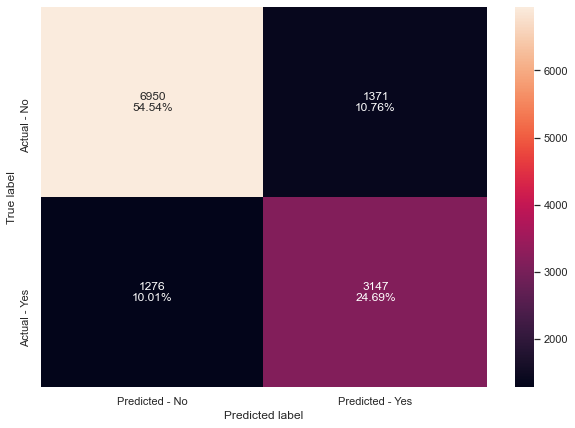

<IPython.core.display.Javascript object>

In [1246]:
make_confusion_matrix(dTree, y_test)

In [1247]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.988769628304512
Recall on test set :  0.7115080262265431


<IPython.core.display.Javascript object>

* Surprised the recall on the training set is not 1.0
* Recall on test set is actually very good since this tree isn't pruned and should have a large amount of overfitting
* But logistic regression model was still higher reaching up to an 80% recall

#### Visualize the decision tree

In [1248]:
feature_names = list(x_train.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

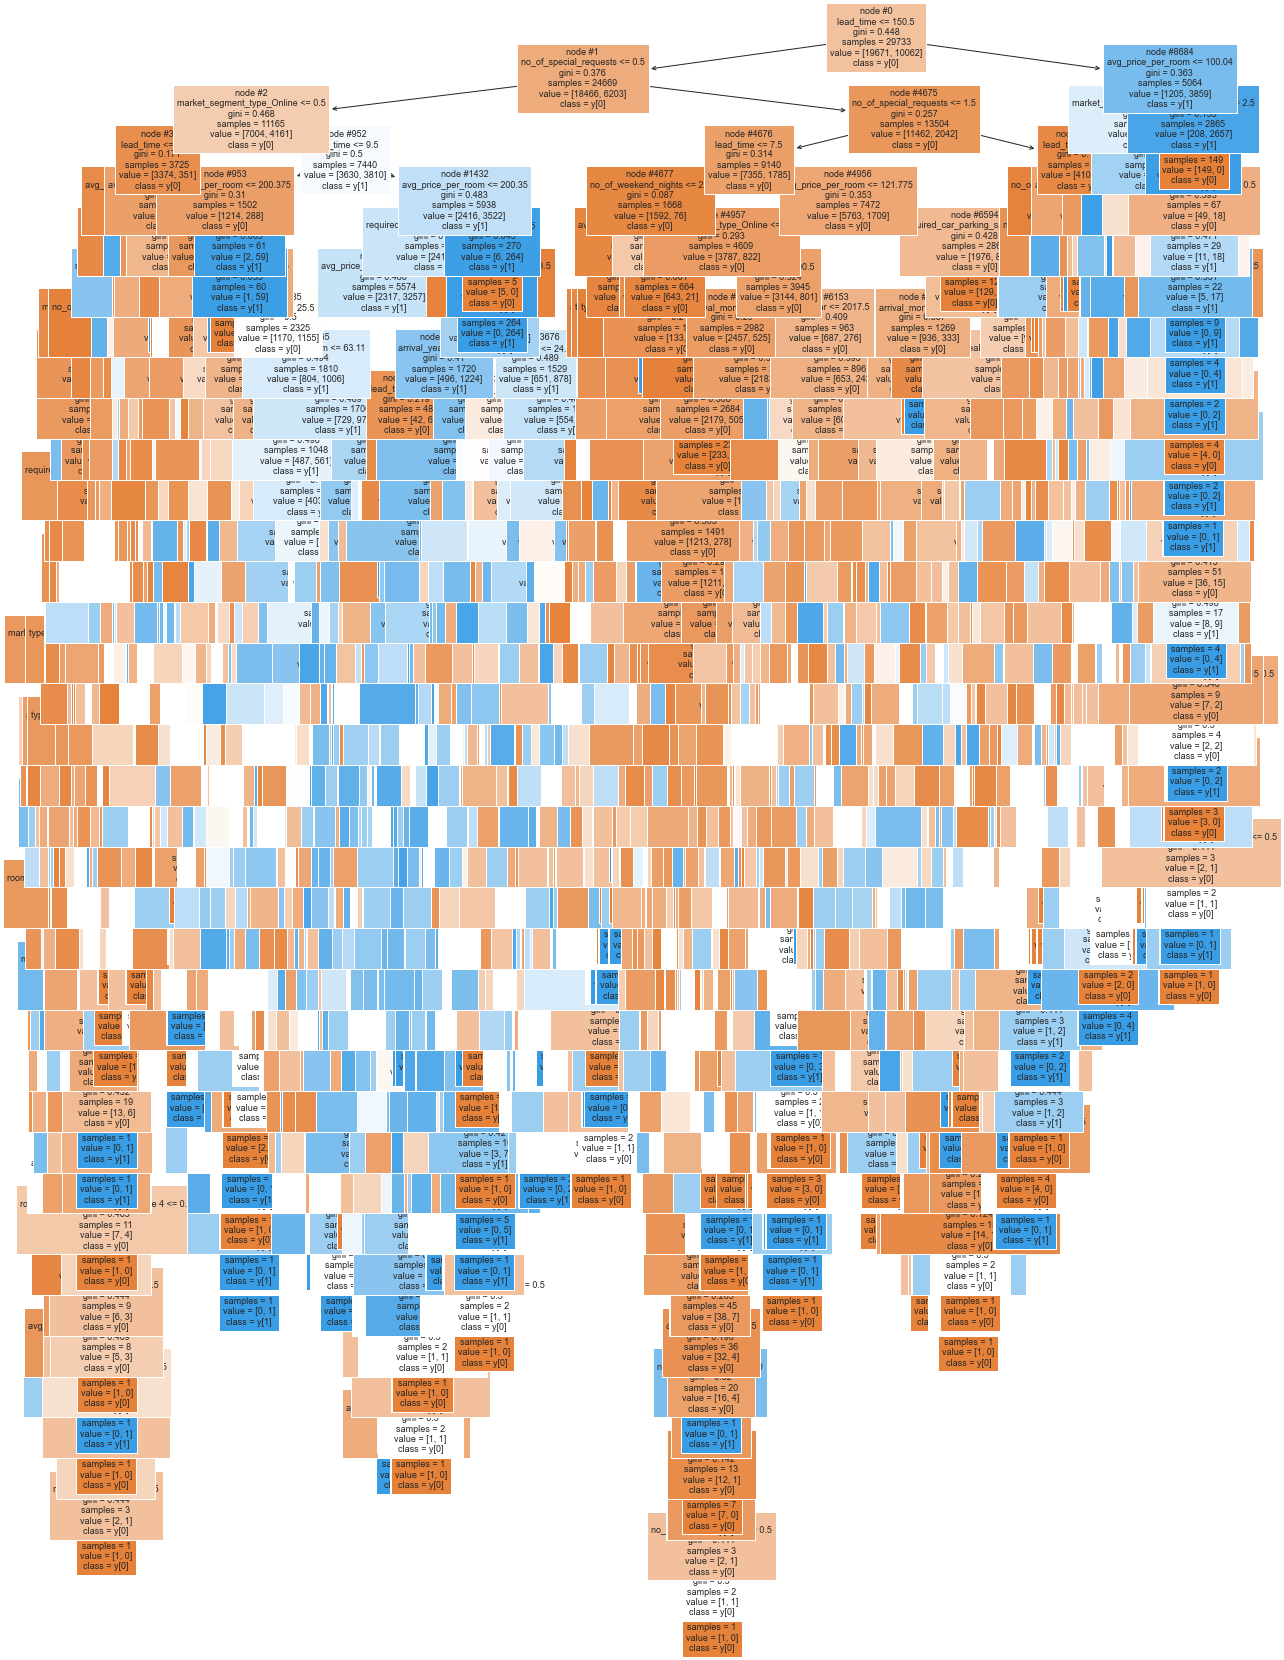

<IPython.core.display.Javascript object>

In [1249]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [1250]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 86.50
|   |   |   |   |--- avg_price_per_room <= 202.50
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |   |--- weights: [102.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 63.20
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  9.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room

<IPython.core.display.Javascript object>

In [1252]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35011
avg_price_per_room                   0.15309
no_of_special_requests               0.10002
arrival_date                         0.09695
market_segment_type_Online           0.07914
arrival_month                        0.06577
no_of_week_nights                    0.04931
no_of_weekend_nights                 0.03199
arrival_year                         0.01888
no_of_adults                         0.01452
type_of_meal_plan_Not Selected       0.00943
room_type_reserved_Room_Type 4       0.00748
no_of_children                       0.00697
required_car_parking_space           0.00692
type_of_meal_plan_Meal Plan 2        0.00332
room_type_reserved_Room_Type 5       0.00197
room_type_reserved_Room_Type 2       0.00151
market_segment_type_Offline          0.00097
room_type_reserved_Room_Type 6       0.00064
market_segment_type_Corporate        0.00037
repeated_guest                       0.00035
no_of_prev

<IPython.core.display.Javascript object>

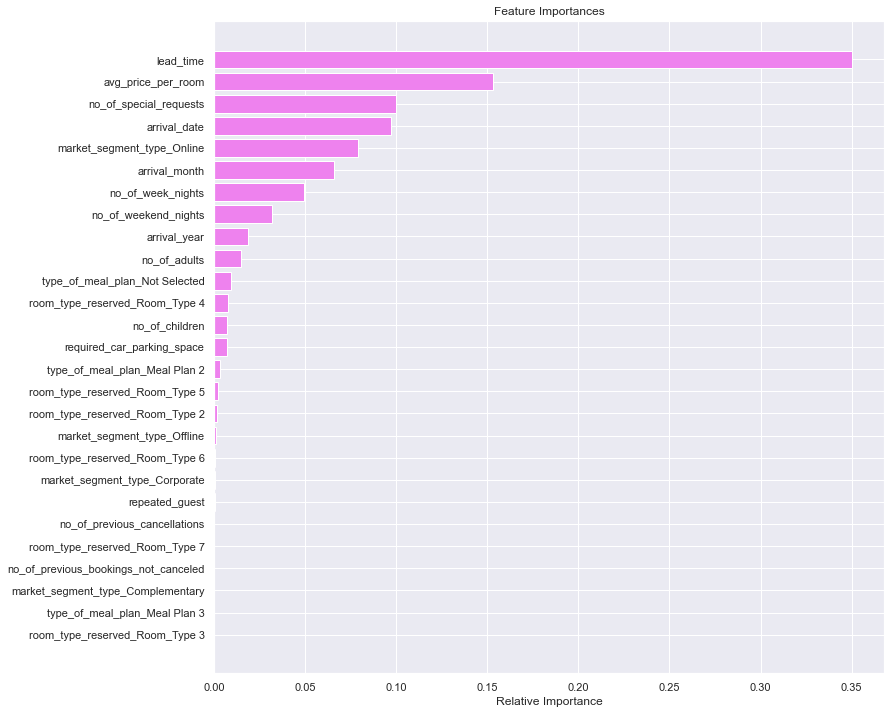

<IPython.core.display.Javascript object>

In [1253]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to decision tree, lead_time is the most important variable for prediciting customer cancelling
* Followed by average price per room

## Do we need to prune the tree?

**The tree above is very complex, such a tree often overfits.**
* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [1256]:
dTree1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

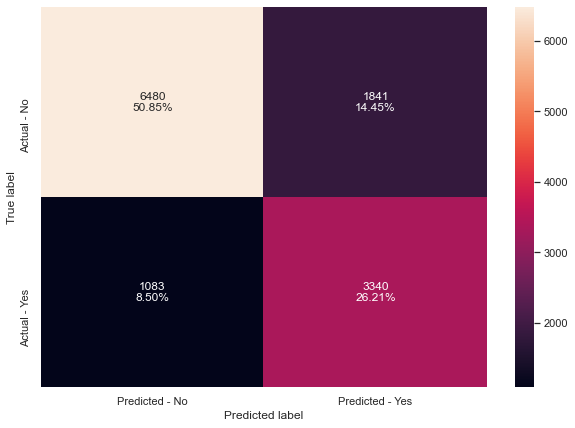

<IPython.core.display.Javascript object>

In [1257]:
make_confusion_matrix(dTree1, y_test)

In [1258]:
# Accuracy on train and test
print("Accuracy on training set : ", dTree1.score(x_train, y_train))
print("Accuracy on test set : ", dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7718360071301248
Accuracy on test set :  0.7705586942875079
Recall on training set :  0.7478632478632479
Recall on test set :  0.7551435677142211


<IPython.core.display.Javascript object>

* Recall on training reduce from 0.98 to 0.75
* BUT recall on test increased from 0.71 to 0.75
* ALSO, really great the training and test data for both the accuracy and recall are nearly the same number
* The accuracy is higher than regression (a more balanced model score) and the recall is nearly to the higher logistic recall score

#### Visualize the tree

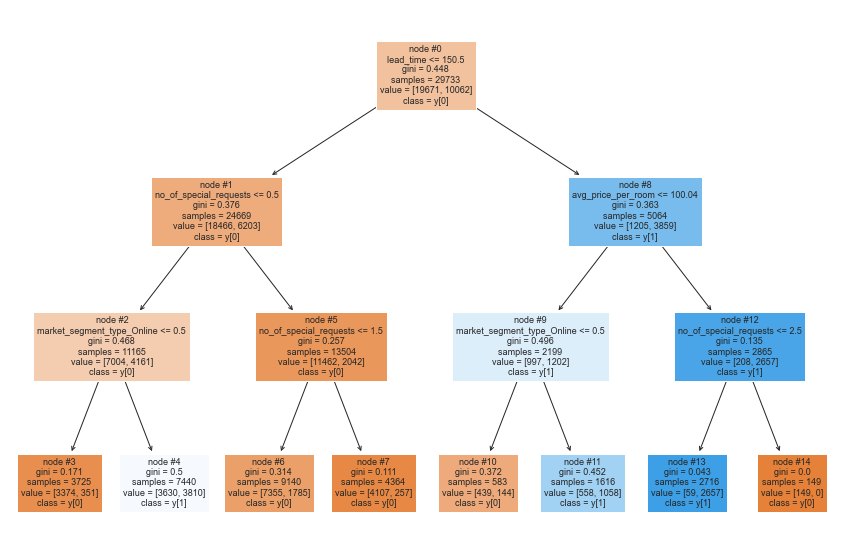

<IPython.core.display.Javascript object>

In [1259]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* You can actually visualize 

In [1260]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [3374.00, 351.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [3630.00, 3810.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [7355.00, 1785.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [4107.00, 257.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [439.00, 144.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [558.00, 1058.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- no_of_special_requests <= 2.50
|   |   |   |--- weights: [59.00, 2657.00] class: 1
|   |   |--- no_of_special_requests >  2.50
|   |   |   |--- weights: [149.00, 0.00] class: 0



<IPython.core.display.Javascript object>

In [1262]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree1.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.48247
market_segment_type_Online           0.22228
no_of_special_requests               0.21579
avg_price_per_room                   0.07946
no_of_week_nights                    0.00000
type_of_meal_plan_Not Selected       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_g

<IPython.core.display.Javascript object>

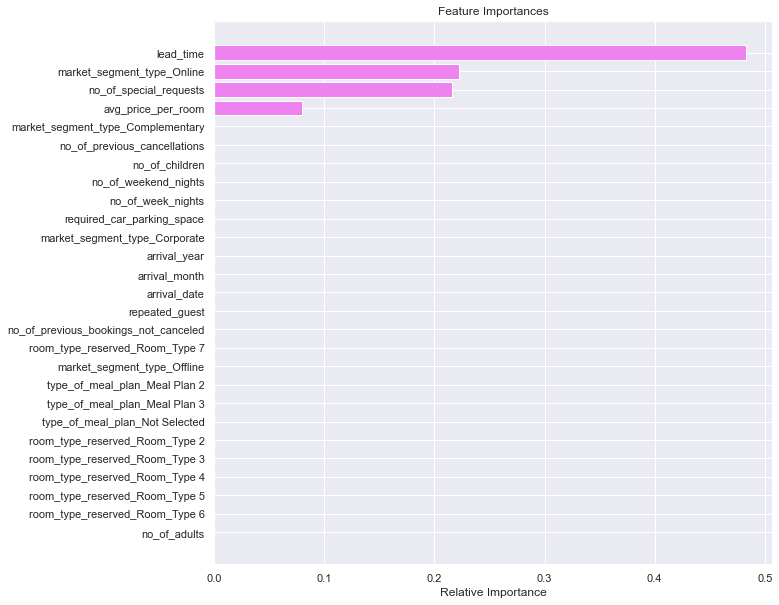

<IPython.core.display.Javascript object>

In [1263]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Test performance has improved and the tree is readable, win!
* Most important feature is still lead time
* Now Online market segment is next important followed by no of special requests
* BUT ignoring a lot of other features (underfit?), try another pruning approach (though happy with this basic pre-pruning)

#### Gridsearch CV hyperparameter tuning

In [1264]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [1265]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

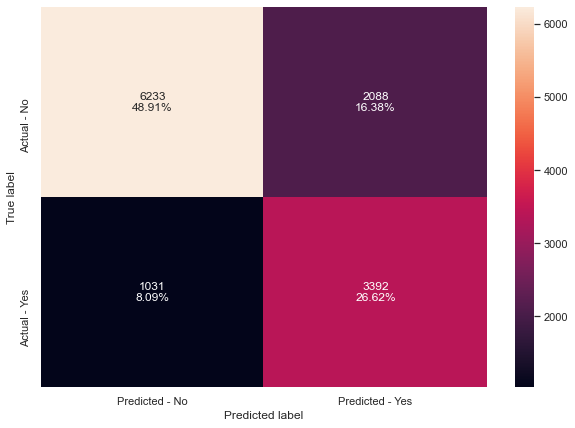

<IPython.core.display.Javascript object>

In [1266]:
make_confusion_matrix(estimator, y_test)

In [1268]:
# Accuracy on train and test
print("Accuracy on training set : ", estimator.score(x_train, y_train))
print("Accuracy on test set : ", estimator.score(x_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7569031042948912
Accuracy on test set :  0.7552573760200879
Recall on training set :  0.7621745179884715
Recall on test set :  0.7669002939181551


<IPython.core.display.Javascript object>

* Was not expecting for the max depth to still be 3
* Pruned some of the leaf nodes
* Improved the Recall with a slight decrease to accuracy, AND test recall is at 77%

#### Visualize the new tree

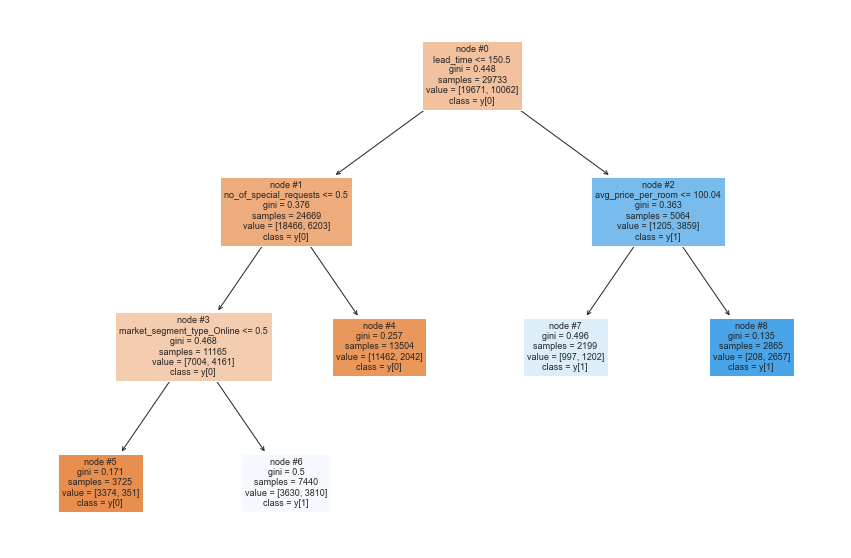

<IPython.core.display.Javascript object>

In [1314]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.savefig("decisiontree.jpg", bbox_inches="tight")
plt.show()

* Still can't believe it's such a small tree, guess the preprune didn't underfit

In [1270]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [3374.00, 351.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [3630.00, 3810.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [11462.00, 2042.00] class: 0
|--- lead_time >  150.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [997.00, 1202.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [208.00, 2657.00] class: 1



<IPython.core.display.Javascript object>

In [1271]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                         Imp
lead_time                            0.54524
market_segment_type_Online           0.21575
no_of_special_requests               0.14922
avg_price_per_room                   0.08979
no_of_week_nights                    0.00000
type_of_meal_plan_Not Selected       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_g

<IPython.core.display.Javascript object>

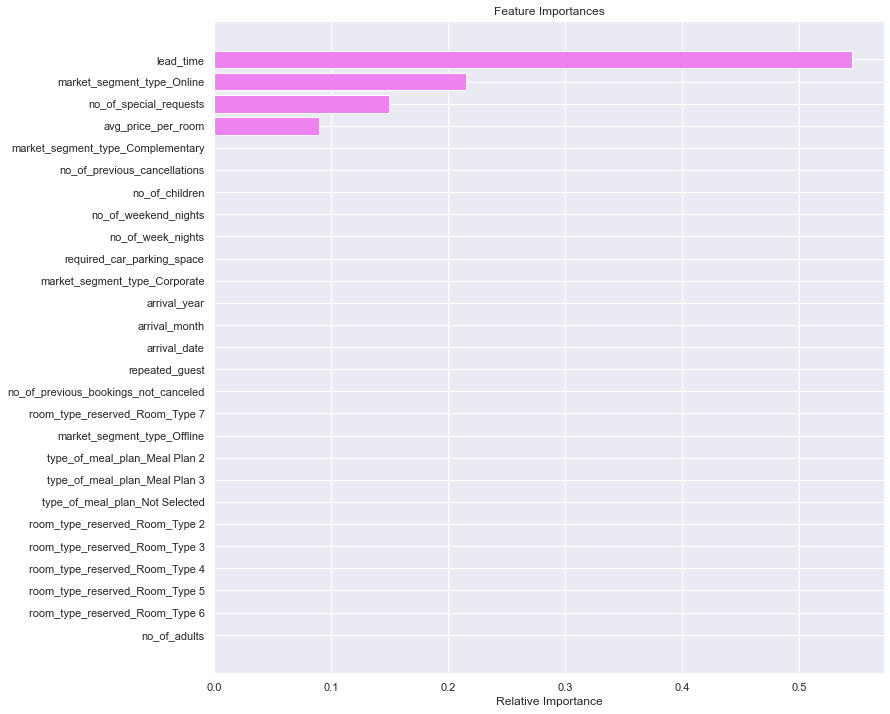

<IPython.core.display.Javascript object>

In [1272]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Just pruned more than the last tree with max depth of 3, less leaf nodes
* Important features are lead time, online, no of special requests and avg price
* Last thing to check and try is post pruning

#### Cost Complexity Pruning

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

https://online.stat.psu.edu/stat508/lesson/11/11.8/11.8.2

In [1274]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [1275]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00380
1        0.00000     0.00380
2        0.00000     0.00380
3        0.00000     0.00380
4        0.00000     0.00380
...          ...         ...
2013     0.00909     0.29965
2014     0.01213     0.31179
2015     0.01299     0.32478
2016     0.02466     0.37410
2017     0.07368     0.44778

[2018 rows x 2 columns]

<IPython.core.display.Javascript object>

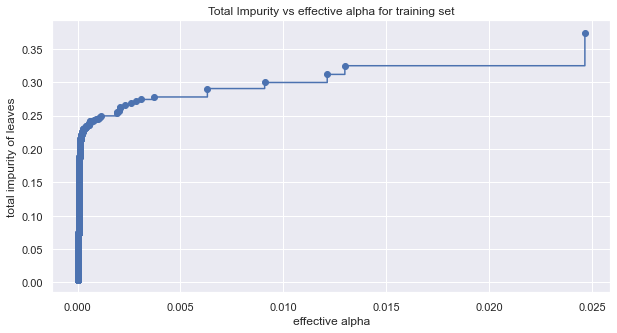

<IPython.core.display.Javascript object>

In [1276]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Sharp increase in impurity of nodes (makes sense possibly why max depth is only 3?)

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1278]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07368068552560181


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

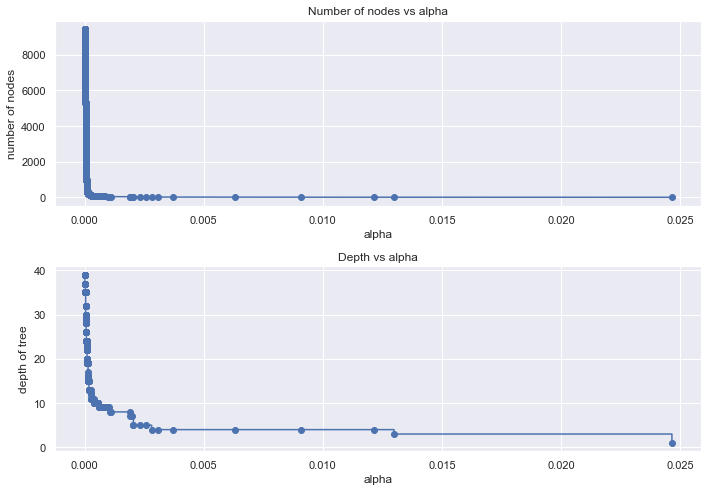

<IPython.core.display.Javascript object>

In [1279]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* Very sharp drop

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [1280]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

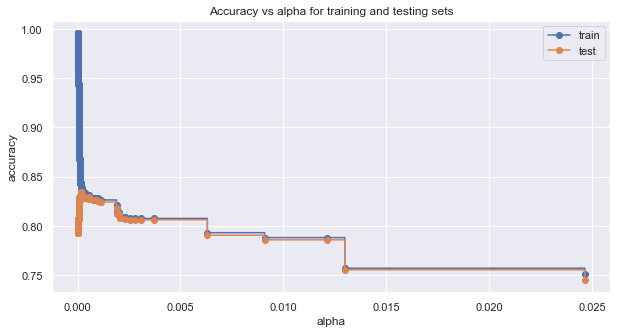

<IPython.core.display.Javascript object>

In [1281]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* The accuracy vs alpha very sharply meet/quickly

In [1282]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(x_train, y_train))
print("Test accuracy of best model: ", best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00016556443254051988, random_state=1)
Training accuracy of best model:  0.841052029731275
Test accuracy of best model:  0.8348242310106717


<IPython.core.display.Javascript object>

#### Since accuracy isn't the right metric for our data we would want high recall

In [1283]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [1284]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(x_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

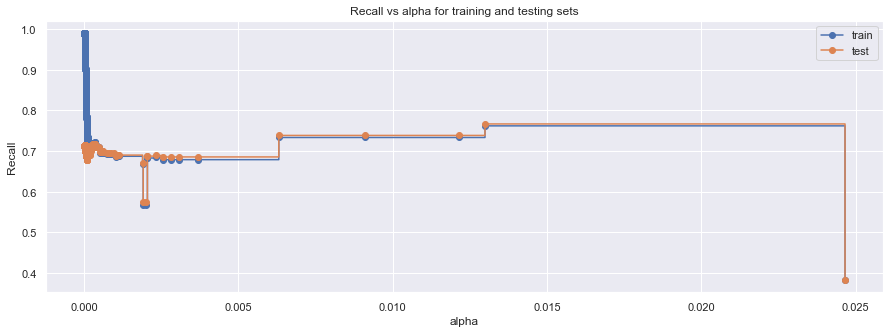

<IPython.core.display.Javascript object>

In [1285]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [1286]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.012991221693702287, random_state=1)


<IPython.core.display.Javascript object>

#### Post Pruned confusion matrix

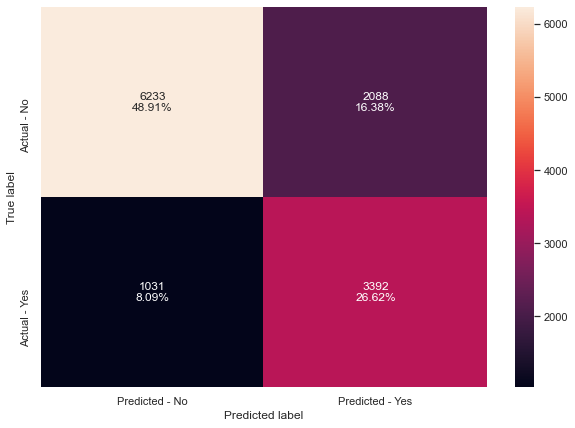

<IPython.core.display.Javascript object>

In [1287]:
make_confusion_matrix(best_model, y_test)

In [1288]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.7621745179884715
Recall on test set :  0.7669002939181551


<IPython.core.display.Javascript object>

* Good recall score, 77% on test and 76% on training
* Matching the Grid CV

#### Visualize the post pruned tree

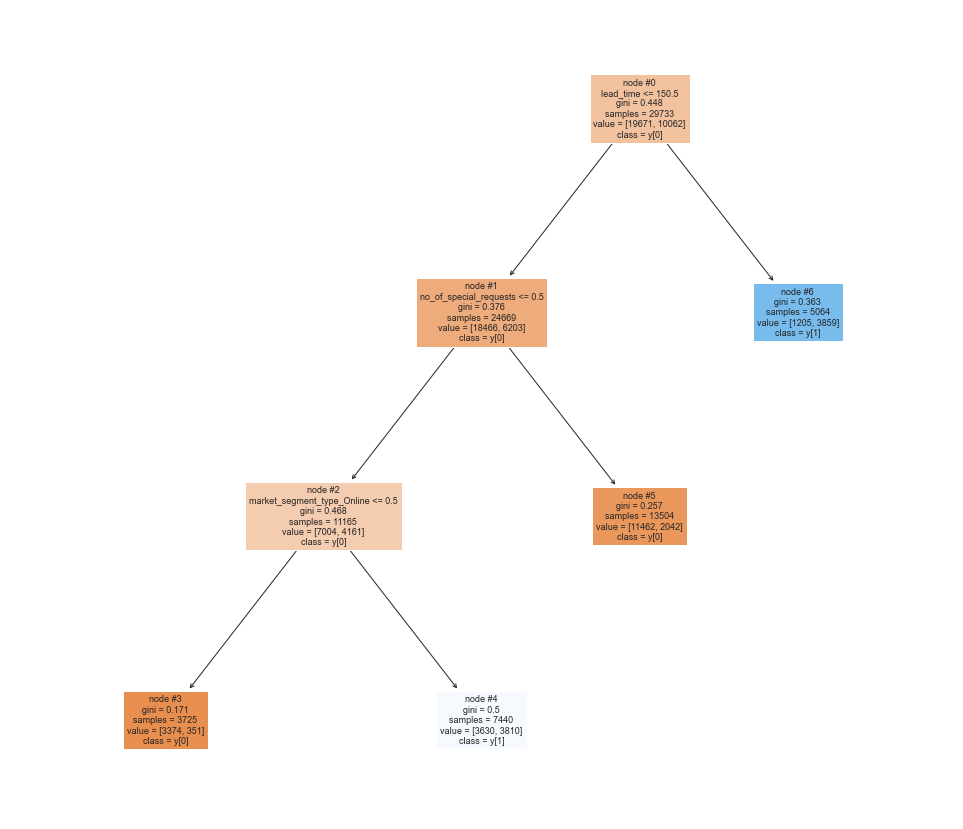

<IPython.core.display.Javascript object>

In [1289]:
plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [1290]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 150.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [3374.00, 351.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [3630.00, 3810.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [11462.00, 2042.00] class: 0
|--- lead_time >  150.50
|   |--- weights: [1205.00, 3859.00] class: 1



<IPython.core.display.Javascript object>

In [1291]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.59903
market_segment_type_Online           0.23703
no_of_special_requests               0.16394
no_of_week_nights                    0.00000
required_car_parking_space           0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Not Selected       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
avg_price_per_room                   0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_g

<IPython.core.display.Javascript object>

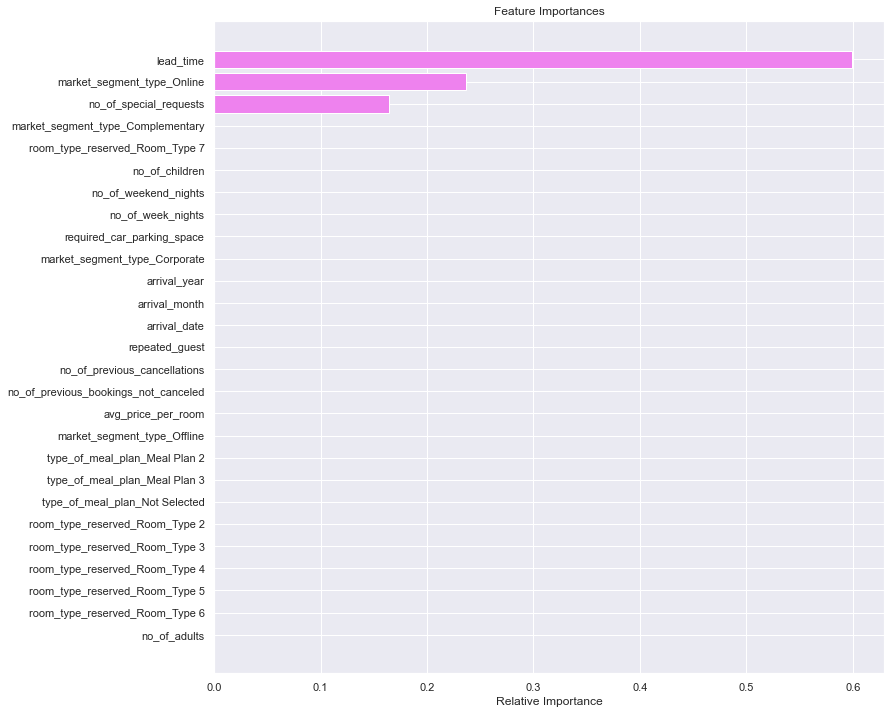

<IPython.core.display.Javascript object>

In [1292]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Even less features are important on the post pruning
* Lead time seems to be the most influential feature on every decision tree
* Online is next followed by special requests

## Model Performance Comparison and Conclusions

In [1295]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with restricted maximum depth",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [0.989, 0.748, 0.762, 0.762],
        "Test_Recall": [0.712, 0.755, 0.767, 0.767],
    }
)
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model       0.98900      0.71200
1  Decision tree with restricted maximum depth       0.74800      0.75500
2     Decision tree with hyperparameter tuning       0.76200      0.76700
3              Decision tree with post-pruning       0.76200      0.76700

<IPython.core.display.Javascript object>

* Post-pruning and Hyperparameter tuning have the same and highest scores
* Max depth is very close
* And even initial on the test data is close
* I believe this is because the high weight of the lead feature, lead time
* With each decision tree, it's a great thing for Star Hotels to know they can cancel the booking if lead times are greater than 150 days

#### Conclusions
* Lead time, No of special requests, online booking, and average price (in that order) of room are the most important variables to determine if a booked room will cancel
* Booked rooms with a lead time of MORE than 150 days from booking to arrival date can be expected to cancel, should not take booking with advance times higher than 150 days
* With lead times less than 150 days, no special requests, and booked online there is potential for cancellation
* Customers who book with at least 1 special request are not expected to cancel their booking

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#### Profitable policies for cancellations and refunds can hotel adopt | Recommendations:

* First, do not allow bookings greater than 150 days in advance of arrival.  This step alone will decrease cancellations as bookings out this great are expected to cancel.
* Cancellations have a higher lead time and bookings with less lead time are likely to not cancel;  If you place a cancellation fee that starts within a week of arrival customers would cancel before the week opening it up to a customer base to book in that week that are much less likely to cancel
* Ensure on your online booking tool the option for special requests is predominantly displayed on not able to be missed by guests who book online.  If a guest books online with a special request they are not expected to cancel.
* In the online rooms (higher avg cost per room), ~110 euros are less likely to cancel than ~120 euros; recommend rooms available > 7-14 days out priced slightly lower to lower risk of cancellation
* 90% of guests do not bring children and 48% of the guests that book with children cancel, gear your ads and hotel perks towards adults (Happy Hour, spa, etc.)
* Only 3% of the bookings are repeat guests but repeat guests only cancelled 0.8%; grow repeat guest base to lower cancellations
* Booking Offline decreases chance of customer canceling; Whereas booking Online increases chance of canceling
* Repeat guests also favour off season months (Jan, Feb), you could provide complementary room (Type 1) during off-season to gain a repeat guests or an upgrade to Type 4 room
* Room Type 1 and 4 most favoured and Online most favoured booking...maybe have these rooms in the top searches for room searches
* Though meal type 1 is most selected keep option open and when someone makes no meal selection it's a potential indication of cancelling

## Whew!